# Lending club case study

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [316]:
lo = pd.read_csv('loan.csv')

In [317]:
lo.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,NaN,1,INDIVIDUAL


To find the dimention of the data frame we use .shape from this we got insights about the number of columns and the rows

In [318]:
lo.shape

(39717, 53)

using .info we get the data type and the number of non null values from the data set

In [319]:
lo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           39717 non-null  int64  
 1   member_id                    39717 non-null  int64  
 2   loan_amnt                    39717 non-null  int64  
 3   funded_amnt                  39717 non-null  int64  
 4   funded_amnt_inv              39717 non-null  float64
 5   term                         39717 non-null  object 
 6   int_rate                     39717 non-null  object 
 7   installment                  39717 non-null  float64
 8   grade                        39717 non-null  object 
 9   sub_grade                    39717 non-null  object 
 10  emp_title                    37258 non-null  object 
 11  emp_length                   38642 non-null  object 
 12  home_ownership               39717 non-null  object 
 13  annual_inc      

nunique() function return number of unique elements in the object

In [320]:
rep = lo.nunique()

In [321]:
rep = rep[rep.values == 1]

In [322]:
rep.head()

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
dtype: int64

we drop all the columns who have only one unique element that is NaN

In [323]:
lo.drop(labels=list(rep.index), axis=1, inplace=True)
lo.shape

(39717, 48)

we drop the user defined feilds are we are not focusing on individual client so we drop the id,url,memberid etc

In [324]:
lo = lo.drop(['id','url','zip_code','member_id','desc'], axis=1)
lo.shape

(39717, 43)

we are using .replce to replace n/a with selfemployed and .fillna to fill 0 at emply fields

In [325]:
lo.emp_length.fillna('0', inplace=True)
lo.emp_length.replace(['n/a'],'Self-Employed', inplace=True)
print(lo.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' '0']


we are removing the % symble from the int_rate field and converting it to float data type

In [326]:
lo.int_rate = lo.int_rate.apply(lambda x: float(x[0:-1]))

In [327]:
lo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    39717 non-null  int64  
 1   funded_amnt                  39717 non-null  int64  
 2   funded_amnt_inv              39717 non-null  float64
 3   term                         39717 non-null  object 
 4   int_rate                     39717 non-null  float64
 5   installment                  39717 non-null  float64
 6   grade                        39717 non-null  object 
 7   sub_grade                    39717 non-null  object 
 8   emp_title                    37258 non-null  object 
 9   emp_length                   39717 non-null  object 
 10  home_ownership               39717 non-null  object 
 11  annual_inc                   39717 non-null  float64
 12  verification_status          39717 non-null  object 
 13  issue_d         

we are grouping all the numarical columns together  

In [328]:
num = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
lo[num] = lo[num].apply(pd.to_numeric)

In [329]:
lo[num].head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,int_rate,annual_inc,dti
0,5000,5000,4975.0,162.87,10.65,24000.0,27.65
1,2500,2500,2500.0,59.83,15.27,30000.0,1.00
2,2400,2400,2400.0,84.33,15.96,12252.0,8.72
3,10000,10000,10000.0,339.31,13.49,49200.0,20.00
4,3000,3000,3000.0,67.79,12.69,80000.0,17.94


we are finding the percentage of loan status

In [330]:
(lo.loan_status.value_counts()*100)/len(lo)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

we are calculationg the percentage of purpose of loan

In [331]:
(lo.purpose.value_counts()*100)/len(lo)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

In [332]:
r = (lo.purpose.value_counts()*100)/len(lo)

we are considering the percentage above one and excluding 'other' purpose for analysis 

In [333]:
r = r[(r < 1) | (r.index == 'other')]

In [334]:
print(lo.purpose.unique())

['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']


we will drop the 'other' and purpose whos percentage is less than 1

In [335]:
lo.drop(labels=lo[lo.purpose.isin(r.index)].index, inplace=True)

In [336]:
lo.shape

(34534, 43)

We are calculating the loan to income to find the burden on the person 

In [337]:
lo['loan_to_income'] = lo['loan_amnt']/lo['annual_inc']

In [338]:
lo.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,mths_since_last_major_derog,loan_to_income
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,NaN,0.208333
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,NaN,0.083333
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,NaN,0.195886
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,632.21,0.0,0.00,0.00,Jan-15,161.03,NaN,Jan-16,NaN,0.138889
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,3125.23,0.0,0.00,0.00,May-16,1313.76,NaN,May-16,NaN,0.148923


we are splitting the issue date to month and year for further analysis

In [339]:
lo['loan_issued_month'],lo['loan_issued_year'] = lo['issue_d'].str.split('-', 1).str

In [340]:
lo[['issue_d','loan_issued_month','loan_issued_year']].head()

,issue_d,loan_issued_month,loan_issued_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
5,Dec-11,Dec,11
6,Dec-11,Dec,11


In [341]:
lo.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,mths_since_last_major_derog,loan_to_income,loan_issued_month,loan_issued_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0.00,0.00,Jan-15,171.62,NaN,May-16,NaN,0.208333,Dec,11
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,NaN,0.083333,Dec,11
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0.00,0.00,Jun-14,649.91,NaN,May-16,NaN,0.195886,Dec,11
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0.00,0.00,Jan-15,161.03,NaN,Jan-16,NaN,0.138889,Dec,11
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,0.00,0.00,May-16,1313.76,NaN,May-16,NaN,0.148923,Dec,11


In [342]:
lo.mths_since_last_major_derog.sum()

0.0

In [343]:
lo = lo.drop('mths_since_last_major_derog',axis=1)

In [344]:
lo.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,loan_to_income,loan_issued_month,loan_issued_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.208333,Dec,11
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.083333,Dec,11
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.195886,Dec,11
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0.0,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.138889,Dec,11
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,0.0,0.00,0.00,May-16,1313.76,NaN,May-16,0.148923,Dec,11


We start creating derived metrics from the columns by grouping them into bins and every record will be seggrigated under bins
to plot them and to do univerate analysis for individual columns 

In [347]:
lo.dti.max()

29.99

In [348]:
lo.dti.median()

13.57

In [349]:
lo.dti.min()

0.0

In [350]:
lo.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2062
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
title                          7
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     22527
mths_since_last_record     32118
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    33
total_acc                      0
out_prncp                      0
out_prncp_

In [351]:
bins_loan = [0,5000,10000,15000,20000,25000,40000]

In [352]:
slot_loan = ['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000 above']

In [353]:
lo['loan_amnt_bins'] = pd.cut(lo['loan_amnt'], bins_loan, labels=slot_loan)

In [354]:
bins_ai = [0,25000,50000,75000,100000,1000000]

In [355]:
slot_ai = ['0-25000','25000-50000','50000-75000','75000-100000','100000 above']

In [356]:
lo['annual_inc_bins'] = pd.cut(lo['annual_inc'], bins_ai, labels=slot_ai)

In [357]:
bins_int = [0,7.5,10,12.5,15,20]

In [358]:
slot_int = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 above']

In [359]:
lo['int_rate_bins'] = pd.cut(lo['int_rate'], bins_int, labels=slot_int) 

In [360]:
bins_dti = [0,5,15,20,25,30]

In [361]:
slot_dti = ['0-5','5-10','10-20','20-25','25 above']

In [362]:
lo.dti.describe()

count    34534.000000
mean        13.499766
std          6.625397
min          0.000000
25%          8.430000
50%         13.570000
75%         18.720000
max         29.990000
Name: dti, dtype: float64

# Univerate analysis

we use pandas utlity pd.cut to segment or sort the data into bins to group the data under certain range to do analysis on it
this function uses contionues variables

In [363]:
lo['dti_bins'] = pd.cut(lo['dti'], bins_dti, labels=slot_dti, include_lowest=True)

In [364]:
lo.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,loan_to_income,loan_issued_month,loan_issued_year,loan_amnt_bins,annual_inc_bins,int_rate_bins,dti_bins
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,171.62,NaN,May-16,0.208333,Dec,11,0-5000,0-25000,10-12.5,25 above
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,119.66,NaN,Sep-13,0.083333,Dec,11,0-5000,25000-50000,15 above,0-5
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,649.91,NaN,May-16,0.195886,Dec,11,0-5000,0-25000,15 above,5-10
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,161.03,NaN,Jan-16,0.138889,Dec,11,0-5000,25000-50000,7.5-10,5-10
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,1313.76,NaN,May-16,0.148923,Dec,11,5000-10000,25000-50000,15 above,20-25


In [365]:
lo[lo['dti'] == lo.dti.max()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,loan_to_income,loan_issued_month,loan_issued_year,loan_amnt_bins,annual_inc_bins,int_rate_bins,dti_bins
12678,15000,15000,14975.0,36 months,8.49,473.45,A,A5,Cape May County M.U.A,10+ years,...,495.96,NaN,Aug-15,0.291262,Jul,11,10000-15000,50000-75000,7.5-10,25 above


distribution plot is pretty similar to the histogram functionality in matplotlib. 
Instead of a frequency plot, it plots an approximate probability density for that rating bucket. 
And the curve (or the KDE) that gets drawn over the distribution is the approximate probability density curve

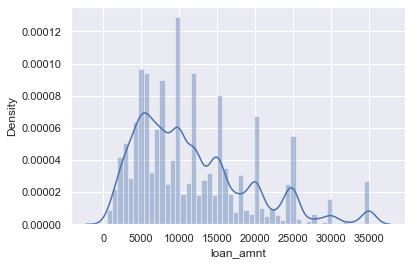

In [366]:
sns.distplot(lo.loan_amnt)
plt.show()

In [367]:
lo.loan_amnt.mean()

11675.90852493195

In [368]:
lo.loan_amnt.median()

10000.0

The boxplot is a standardized way of displaying the distribution of data

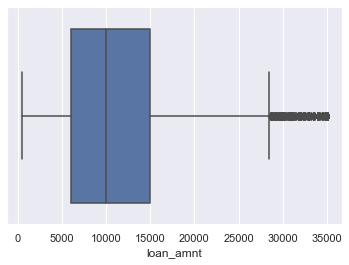

In [369]:
sns.boxplot(lo.loan_amnt,orient='h')
plt.show()

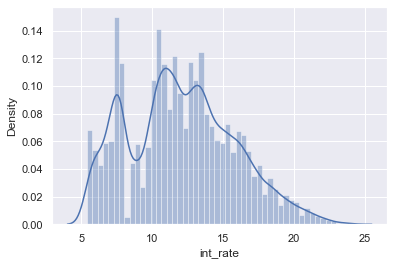

In [370]:
sns.distplot(lo.int_rate)
plt.show()

In [371]:
lo.int_rate.mean()

12.060799501939954

In [372]:
lo.int_rate.median()

11.86

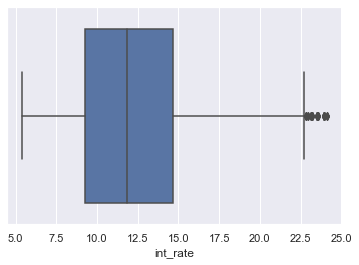

In [373]:
sns.boxplot(lo.int_rate,orient='h')
plt.show()

we have outliers for annual income where the people having high income are groups with low and average income group this will affect 
the analysis hence we remove the outliers 

In [374]:
lo["annual_inc"].describe()

count    3.453400e+04
mean     6.978397e+04
std      6.541865e+04
min      4.080000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.350000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [375]:
q = lo["annual_inc"].quantile(0.995)
lo = lo[lo["annual_inc"] < q]
lo["annual_inc"].describe()

count     34337.000000
mean      67125.479845
std       37280.053686
min        4080.000000
25%       42000.000000
50%       60000.000000
75%       82560.000000
max      294000.000000
Name: annual_inc, dtype: float64

In [376]:
lo.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,loan_to_income,loan_issued_month,loan_issued_year,loan_amnt_bins,annual_inc_bins,int_rate_bins,dti_bins
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,171.62,NaN,May-16,0.208333,Dec,11,0-5000,0-25000,10-12.5,25 above
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,119.66,NaN,Sep-13,0.083333,Dec,11,0-5000,25000-50000,15 above,0-5
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,649.91,NaN,May-16,0.195886,Dec,11,0-5000,0-25000,15 above,5-10
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,161.03,NaN,Jan-16,0.138889,Dec,11,0-5000,25000-50000,7.5-10,5-10
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,1313.76,NaN,May-16,0.148923,Dec,11,5000-10000,25000-50000,15 above,20-25


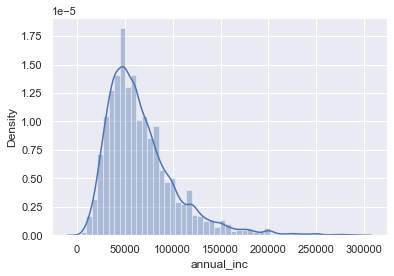

In [377]:
sns.distplot(lo.annual_inc)
plt.show()

In [378]:
lo.annual_inc.median()

60000.0

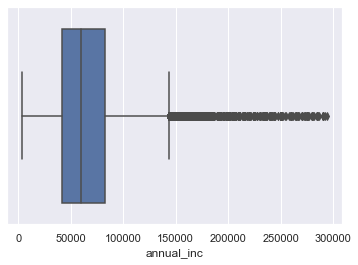

In [379]:
sns.boxplot(lo.annual_inc,orient='h')
plt.show()

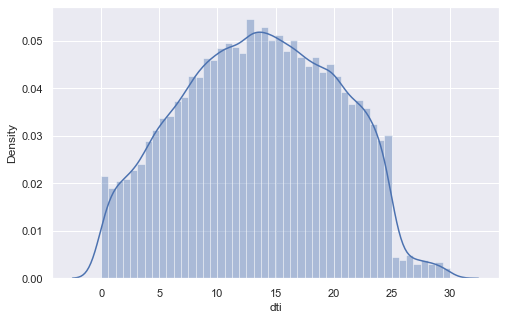

In [435]:
plt.figure(figsize=(8,5))
sns.distplot(lo.dti)
plt.show()

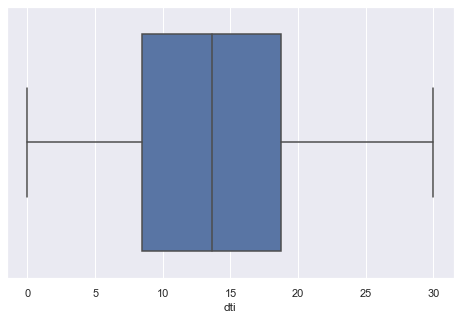

In [434]:
plt.figure(figsize=(8,5))
sns.boxplot(lo.dti,orient='h')
plt.show()

countplot() method is used to Show the counts of observations in each categorical bin using bars. We can get number of loan status to compare fully paid, charged off, currently paying

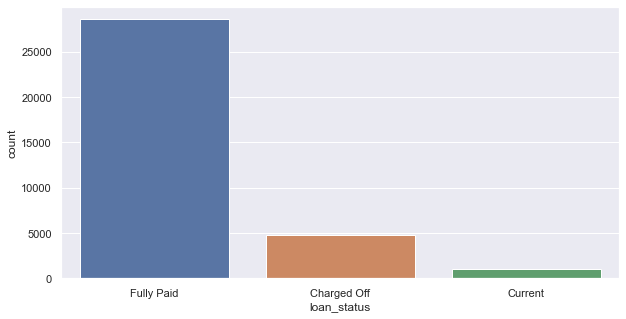

In [380]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.countplot(lo.loan_status)
plt.show()

we can see that dept consolidation has the highest count, we can see car, small buisness, wedding, medical has almost very less current payees   

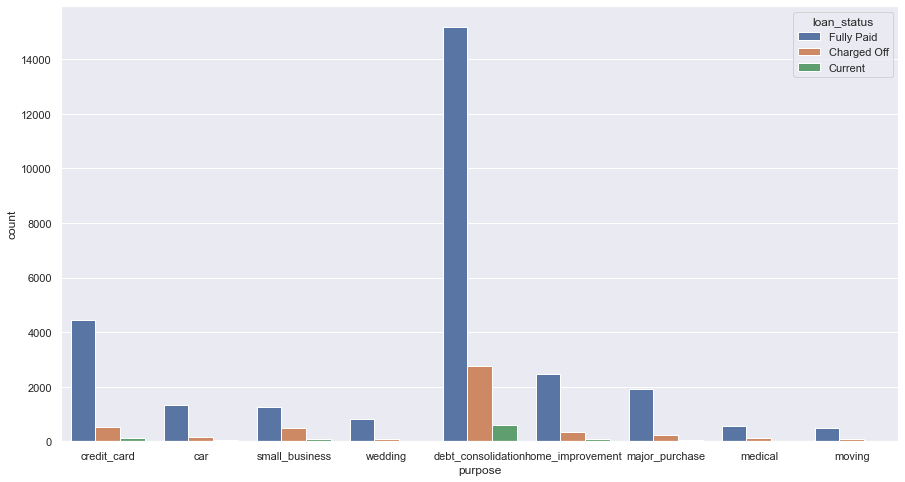

In [448]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data=lo, x = 'purpose', hue='loan_status' )
plt.show()

We can consider only own, rent or mortigage and none, other can be ignored as we can't do analysis on it

In [382]:
lo.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [383]:
d = ['OTHER', 'NONE', 'ANY']
lo.drop(lo[lo['home_ownership'].isin(d)].index,inplace=True)
lo.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

we can see current paying list is less in case of people owning home and the people house under mortgage are having chareged off more than people owning or renting home 

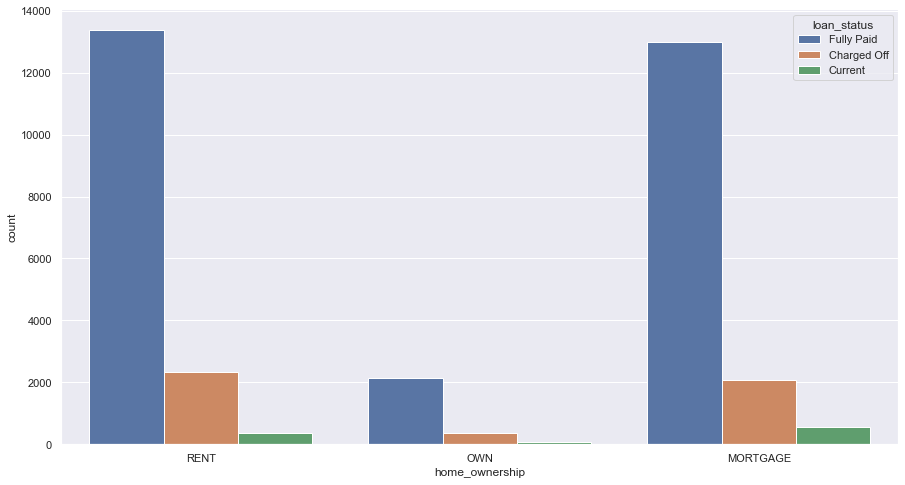

In [446]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data=lo, x = 'home_ownership', hue='loan_status') 
plt.show()

We can see loan applicants are increasing year on year, approx 50%> to pervious years

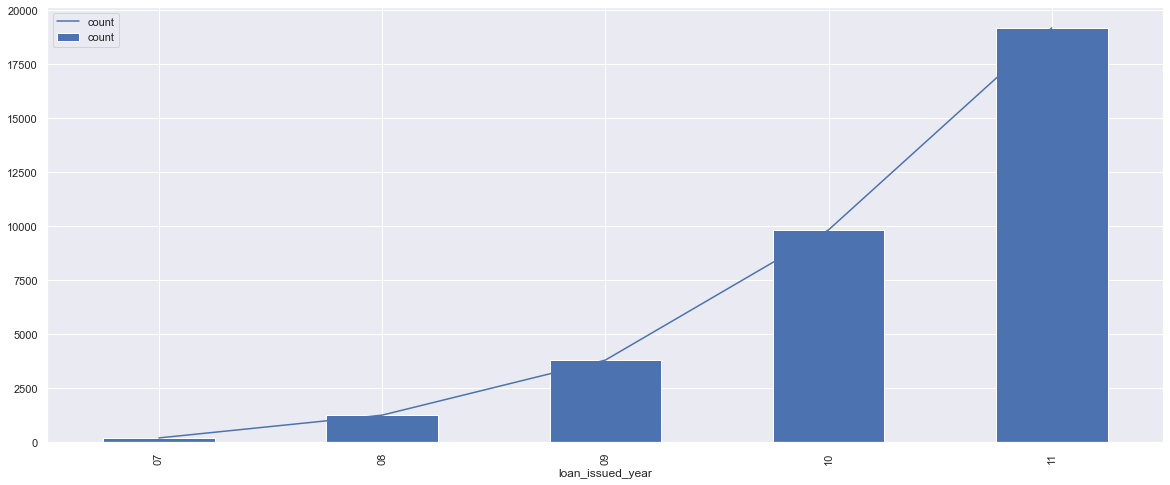

In [385]:
y =lo.groupby(by= [lo.loan_issued_year])[['loan_status']].count()
y.rename(columns={"loan_status": "count"},inplace=True)
ax =y.plot(figsize=(20,8))
y.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

people have selected 36 months tenure more and even fully paid is high where as in 60 month tenure we can see people charged off from paying loan

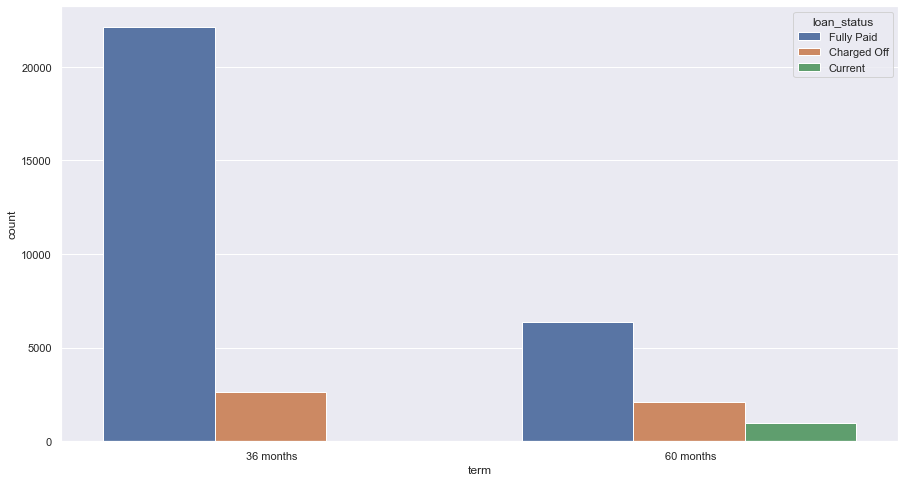

In [450]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(data=lo, x = 'term', hue='loan_status')
plt.show()

## Bivariate analysis

Bivariate Analysis finds out the relationship between two/two or more variables, we are considering purpose, loan amount, loan status and plotting a box plot to find the insights the numarical variables

1)We can see that the median for car loan for charged off, fully paid, current is almost same                                 ----2)We can see currently paying is having high count across all types of loans
--3)We can see more number charged off amount is in small business loan

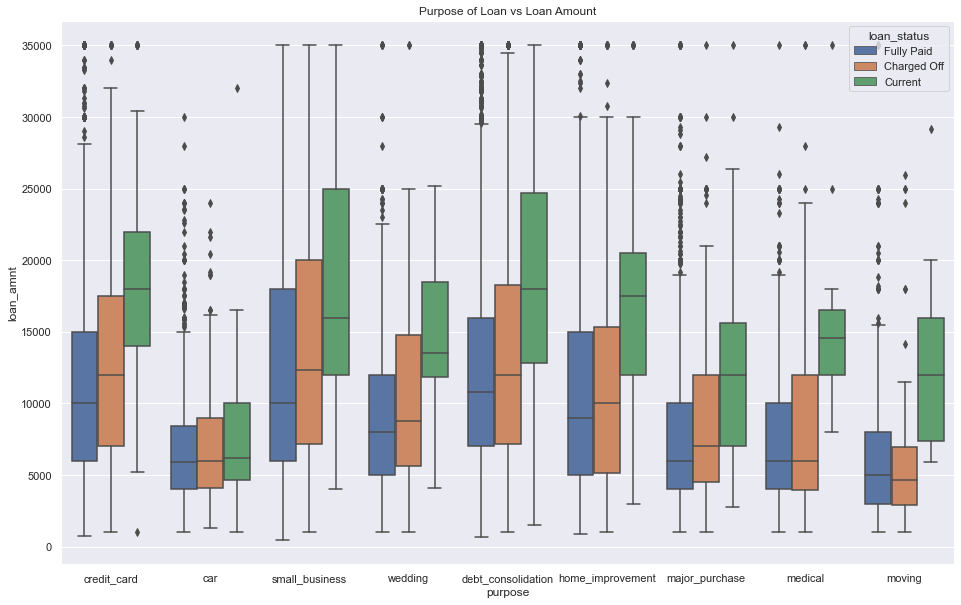

In [456]:
plt.figure(figsize=(16,10))
sns.boxplot(data =lo, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

In [388]:
loan_correlation = lo.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,loan_to_income
loan_amnt,1.000000,0.980843,0.939191,0.321671,0.926243,0.417694,0.076456,-0.032253,0.006776,0.014148,...,0.193314,0.881202,0.849327,0.844165,0.725962,0.055425,0.136565,0.073274,0.439307,0.612642
funded_amnt,0.980843,1.000000,0.958024,0.325562,0.953376,0.413011,0.076115,-0.032641,0.007782,0.015707,...,0.195043,0.898160,0.866065,0.862865,0.733895,0.057913,0.137292,0.075517,0.443913,0.600187
funded_amnt_inv,0.939191,0.958024,1.000000,0.318170,0.901825,0.394763,0.082276,-0.038818,-0.006404,0.072274,...,0.203605,0.876909,0.908957,0.839504,0.727084,0.036350,0.124138,0.060758,0.434737,0.572298
int_rate,0.321671,0.325562,0.318170,1.000000,0.293552,0.080875,0.116717,0.154749,0.134610,-0.058390,...,0.135555,0.319138,0.313625,0.193698,0.541015,0.097917,0.125142,0.068836,0.161401,0.225571
installment,0.926243,0.953376,0.901825,0.293552,1.000000,0.417430,0.063521,-0.019560,0.007443,-0.001378,...,0.124057,0.849811,0.810610,0.842864,0.626872,0.066913,0.118680,0.076629,0.390246,0.547187
annual_inc,0.417694,0.413011,0.394763,0.080875,0.417430,1.000000,-0.128956,0.028013,0.043126,-0.019024,...,0.058471,0.396630,0.381024,0.399789,0.281370,0.023144,0.033601,0.020194,0.215148,-0.322338
dti,0.076456,0.076115,0.082276,0.116717,0.063521,-0.128956,1.000000,-0.037594,0.001414,0.064931,...,0.038691,0.075909,0.080822,0.052115,0.113893,-0.012259,0.025211,0.011498,0.011823,0.160584
delinq_2yrs,-0.032253,-0.032641,-0.038818,0.154749,-0.019560,0.028013,-0.037594,1.000000,0.006880,-0.572836,...,-0.001369,-0.022911,-0.029594,-0.039572,0.024125,0.034242,0.010922,0.013856,-0.015921,-0.061814
inq_last_6mths,0.006776,0.007782,-0.006404,0.134610,0.007443,0.043126,0.001414,0.006880,1.000000,-0.007174,...,-0.008839,-0.012636,-0.021646,-0.027143,0.023445,0.031888,0.020970,0.014126,0.026989,-0.030205
mths_since_last_delinq,0.014148,0.015707,0.072274,-0.058390,-0.001378,-0.019024,0.064931,-0.572836,-0.007174,1.000000,...,0.003458,0.010897,0.057436,0.015347,-0.000752,-0.032521,-0.006946,-0.018445,0.012882,0.022435


Insights: It is clear from the Heatmap that how 'loan_amnt','funded_amnt' & 'funded_amnt_inv' are closely interrelated and 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp' are also having correlation approximately equal to 1, So we can take any one column out of them for our analysis.

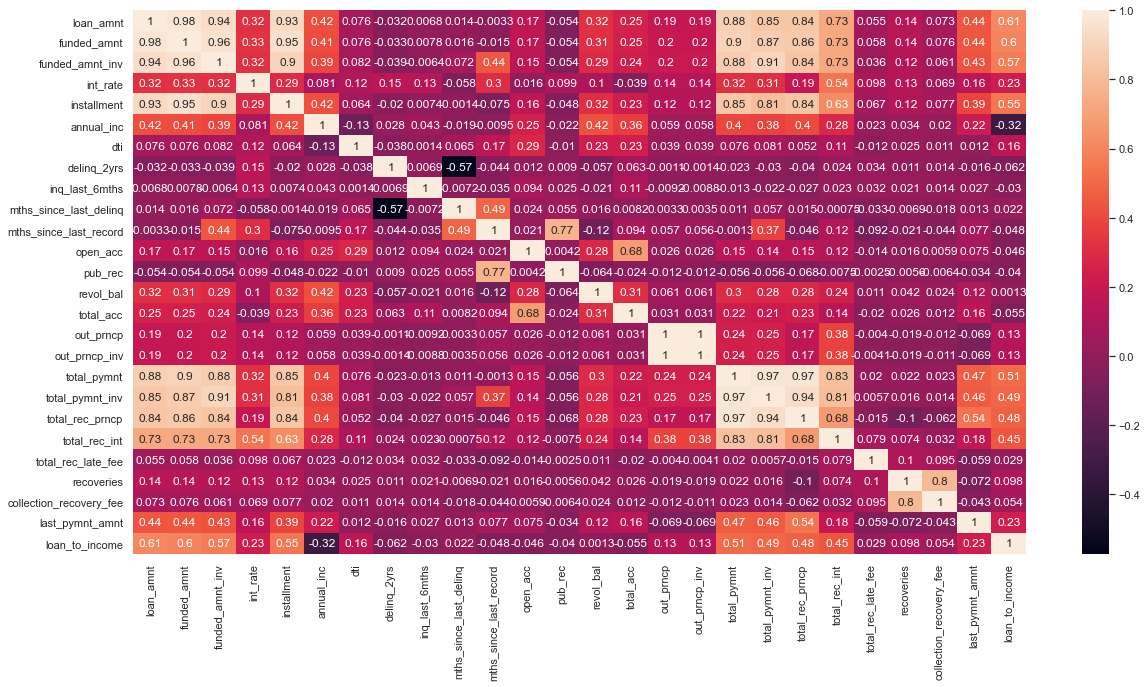

In [455]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

In [390]:
loanstatus=lo.pivot_table(index=['loan_status','purpose','emp_length'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=lo.loc[lo['loan_status']=='Charged Off']

We can see most of the people with 6+ years of experience tend to take loan for small business, there are very less people who opt for moving loan and exception is only in the case of 8 years experienced people. 

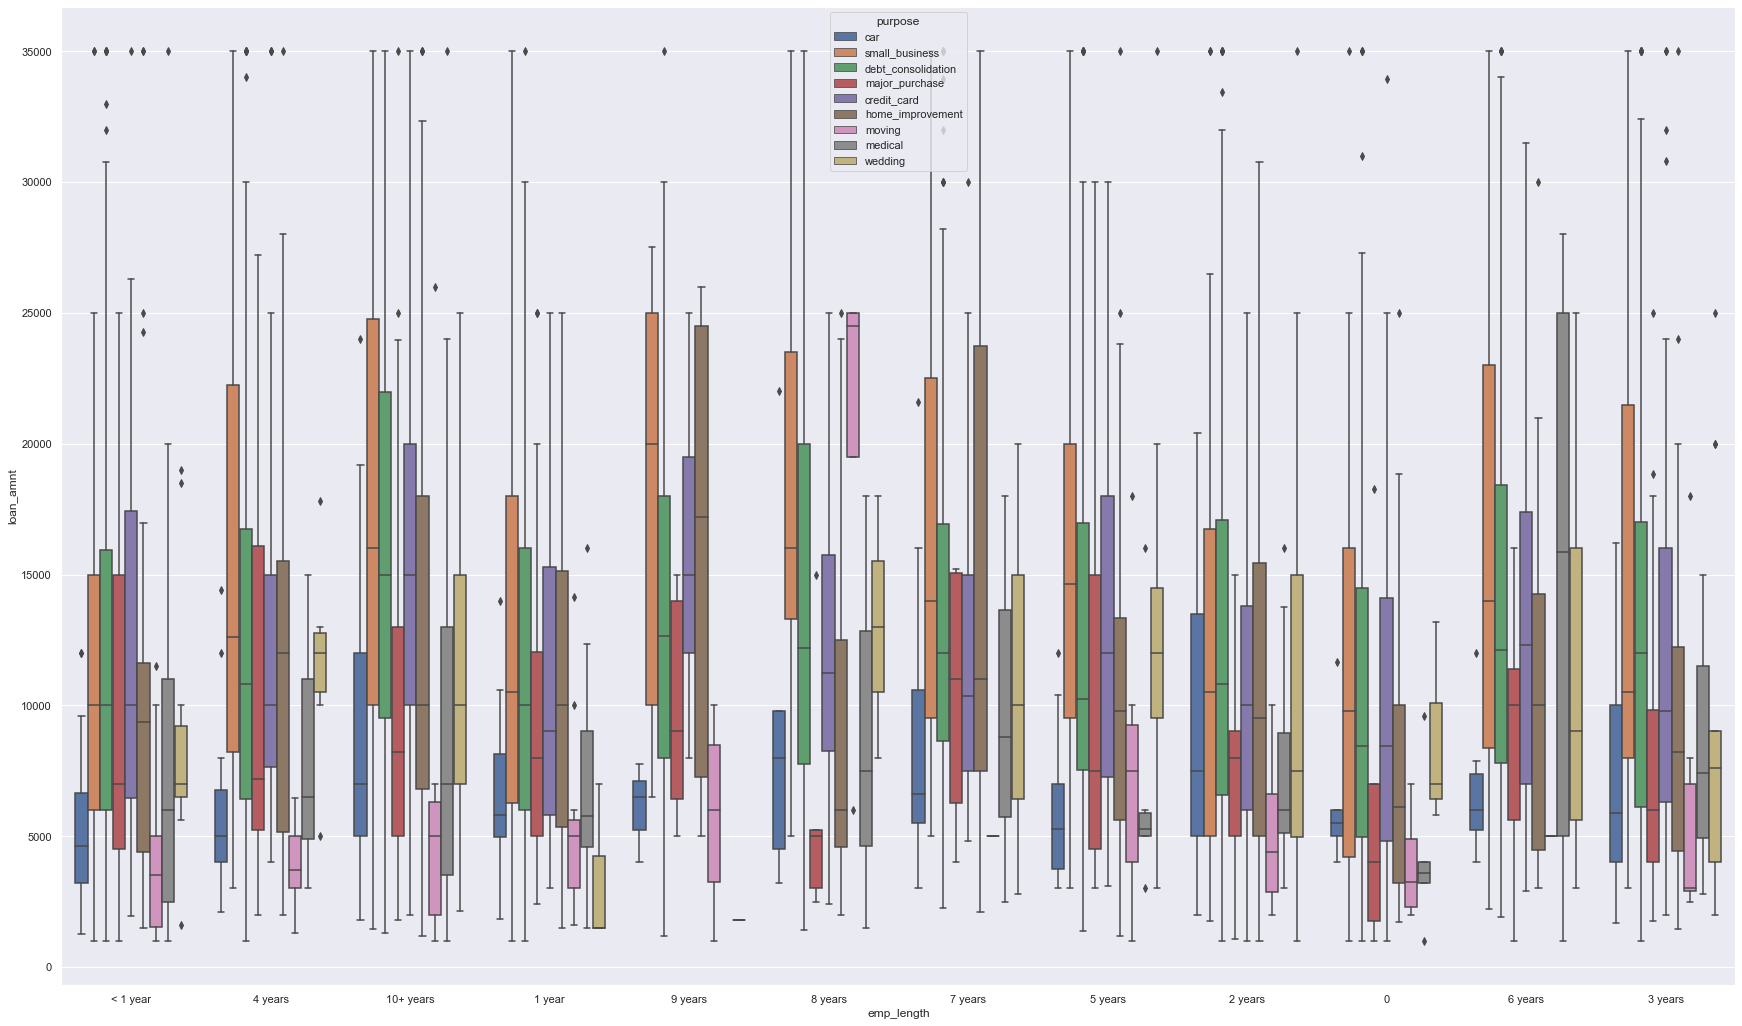

In [391]:
elp = plt.figure(figsize=(30, 18))
elp = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
plt.show()

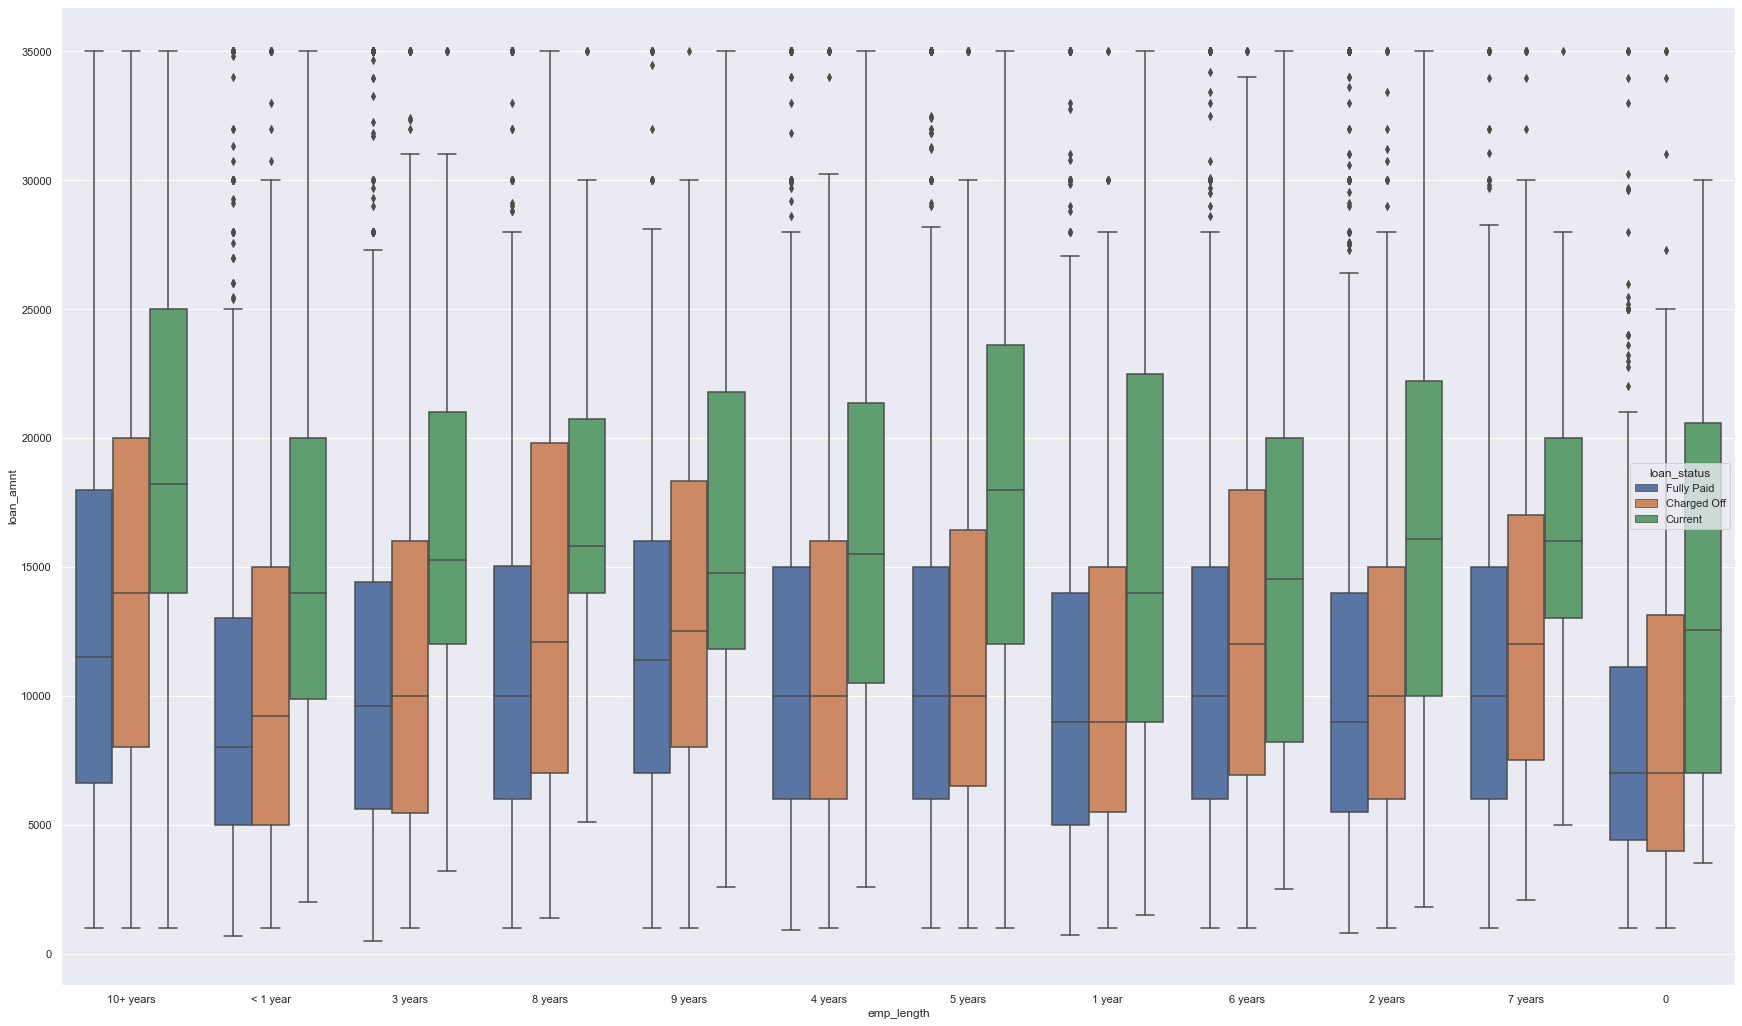

In [452]:
elp_coff = plt.figure(figsize=(30, 18))
elp_coff = sns.boxplot(x='emp_length',y='loan_amnt',hue='loan_status',data=lo)
plt.show()

We can see that there is not much difference with people’s experience and paying their loan amount.       


In [392]:
s = lo.addr_state.value_counts()
s.head()

CA    6143
NY    3224
FL    2445
TX    2344
NJ    1600
Name: addr_state, dtype: int64

In [393]:
s = s[(s < 10)]
lo_f_states = lo.drop(labels = lo[lo.addr_state.isin(s.index)].index)

In [394]:
lo_f_states.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,loan_to_income,loan_issued_month,loan_issued_year,loan_amnt_bins,annual_inc_bins,int_rate_bins,dti_bins
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,171.62,NaN,May-16,0.208333,Dec,11,0-5000,0-25000,10-12.5,25 above
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,119.66,NaN,Sep-13,0.083333,Dec,11,0-5000,25000-50000,15 above,0-5
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,649.91,NaN,May-16,0.195886,Dec,11,0-5000,0-25000,15 above,5-10
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,161.03,NaN,Jan-16,0.138889,Dec,11,0-5000,25000-50000,7.5-10,5-10
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,1313.76,NaN,May-16,0.148923,Dec,11,5000-10000,25000-50000,15 above,20-25


In [395]:
lo_f_states.shape

(34235, 49)

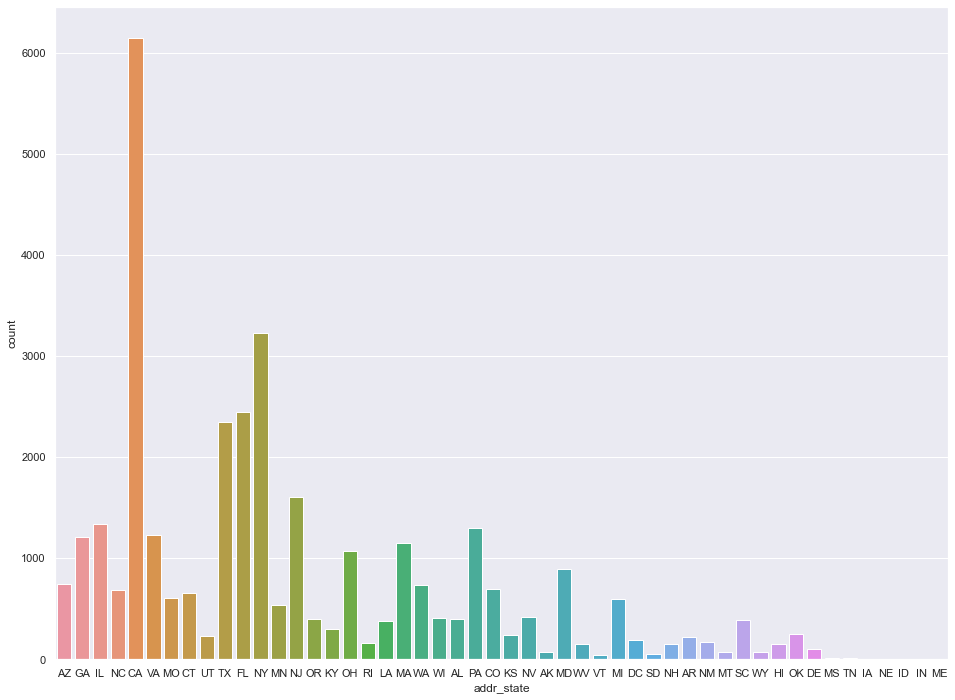

In [396]:
plt.figure(figsize=(16,12))
sns.countplot(lo.addr_state)
plt.show()

In [397]:
c = pd.crosstab(lo_f_states['addr_state'], lo_f_states['loan_status'],margins=True)
c['Probable_Charged Off_of_States '] = round((c['Charged Off']/c['All']),3)

In [398]:
c

loan_status,Charged Off,Current,Fully Paid,All,Probable_Charged Off_of_States
addr_state,,,,,
AK,13,2,56,71,0.183
AL,48,15,337,400,0.120
AR,20,9,188,217,0.092
AZ,101,24,623,748,0.135
CA,958,132,5053,6143,0.156
CO,81,25,588,694,0.117
CT,85,22,545,652,0.130
DC,13,3,172,188,0.069
DE,8,1,88,97,0.082


In [399]:
z = c[0:-1]

In [400]:
z

loan_status,Charged Off,Current,Fully Paid,All,Probable_Charged Off_of_States
addr_state,,,,,
AK,13,2,56,71,0.183
AL,48,15,337,400,0.120
AR,20,9,188,217,0.092
AZ,101,24,623,748,0.135
CA,958,132,5053,6143,0.156
CO,81,25,588,694,0.117
CT,85,22,545,652,0.130
DC,13,3,172,188,0.069
DE,8,1,88,97,0.082


<AxesSubplot:xlabel='addr_state'>

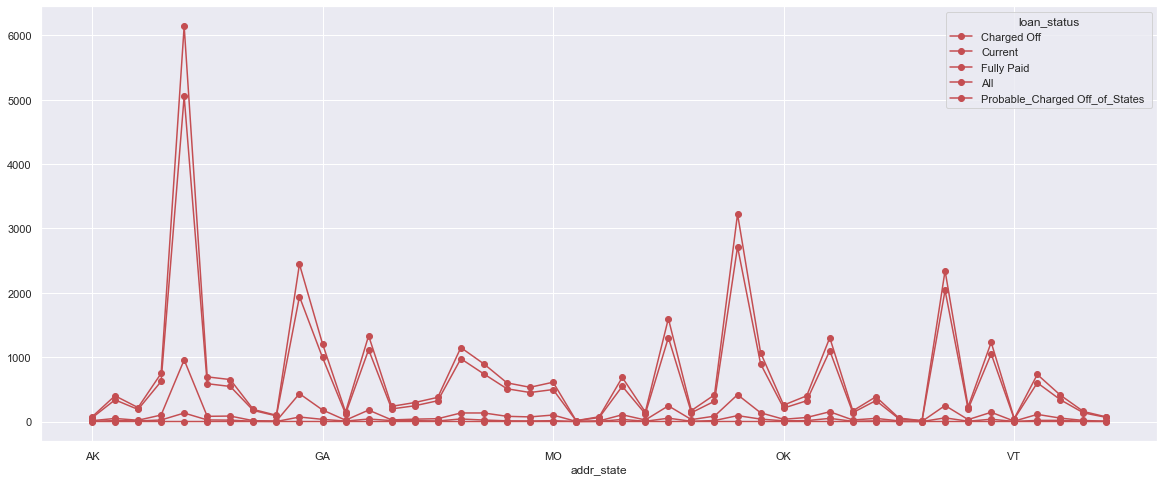

In [401]:
z.plot(figsize=(20,8), marker='o',color = 'r')

1)We can see that the State CA has most number of people opting for loan and there is a really high percentage of people even repaying the loan fully.

2)We can also see the charge off percentage remains the same across most of the states except FL that has high percentage of people charged off not paying loan    


<AxesSubplot:label='f45d9f80-4e2b-4bf3-8cf7-c9b814bcdc01'>

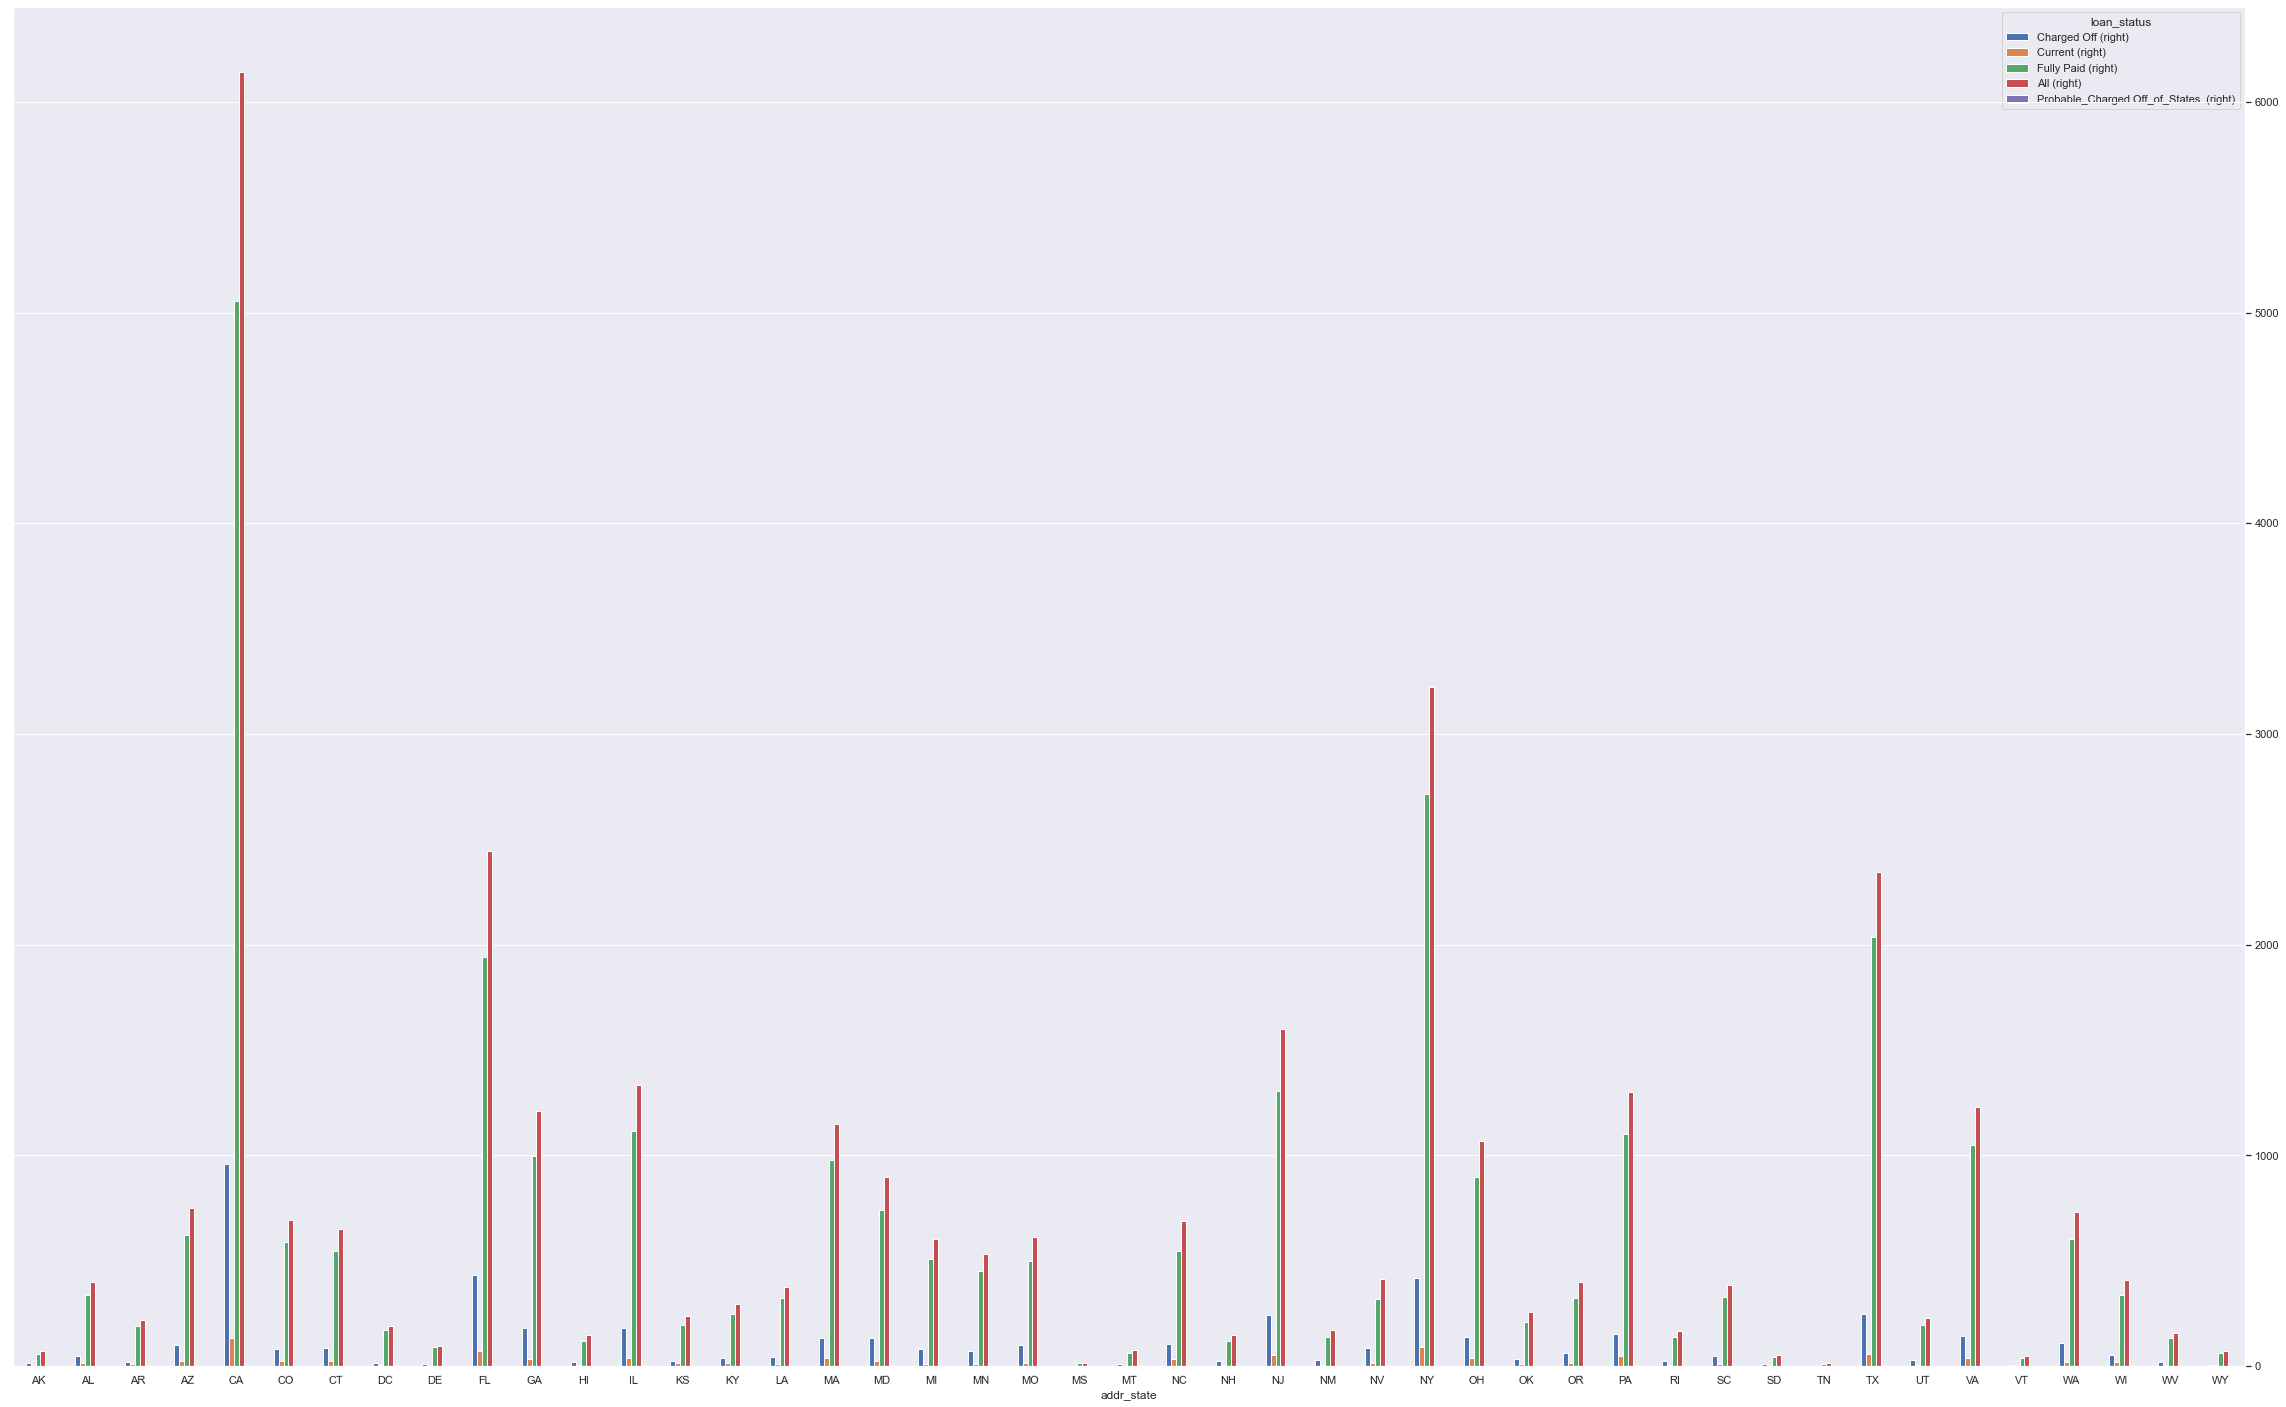

In [459]:
 z.plot(figsize=(40,25),kind='bar',rot=1,secondary_y=True)

In [403]:
purpose_of_loan = pd.crosstab(lo['purpose'], lo['loan_status'],margins=True)
purpose_of_loan['Probable_Charged Off_of_purpose '] = round((purpose_of_loan['Charged Off']/purpose_of_loan['All']),3)

In [404]:
purpose_of_loan = purpose_of_loan[0:-1]

In [405]:
purpose_of_loan

loan_status,Charged Off,Current,Fully Paid,All,Probable_Charged Off_of_purpose
purpose,,,,,
car,159,50,1336,1545,0.103
credit_card,539,103,4457,5099,0.106
debt_consolidation,2753,585,15181,18519,0.149
home_improvement,340,99,2479,2918,0.117
major_purchase,220,37,1912,2169,0.101
medical,106,12,568,686,0.155
moving,90,7,480,577,0.156
small_business,469,74,1262,1805,0.260
wedding,94,20,824,938,0.100


<AxesSubplot:xlabel='purpose'>

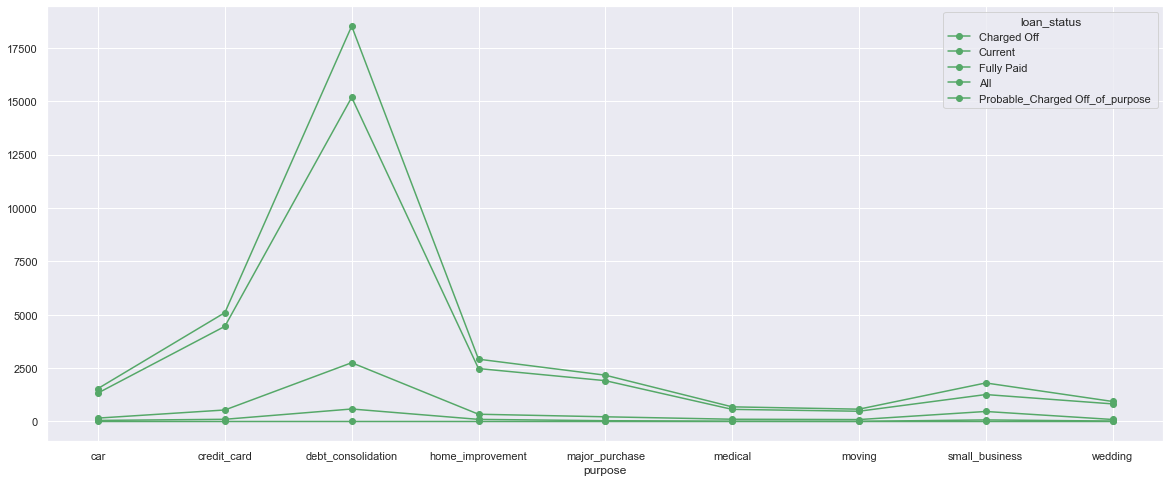

In [406]:
purpose_of_loan.plot(figsize=(20,8), marker='o',color = 'g')

1)We can see that most people take loan for dept consolidation and least amount of loan is taken for moving purpose 

2)We can see that people taking loan for small business have approximately 35%
have been charged off 


<AxesSubplot:label='1f5a83f3-a147-415c-84bd-1eab8e7e4cdf'>

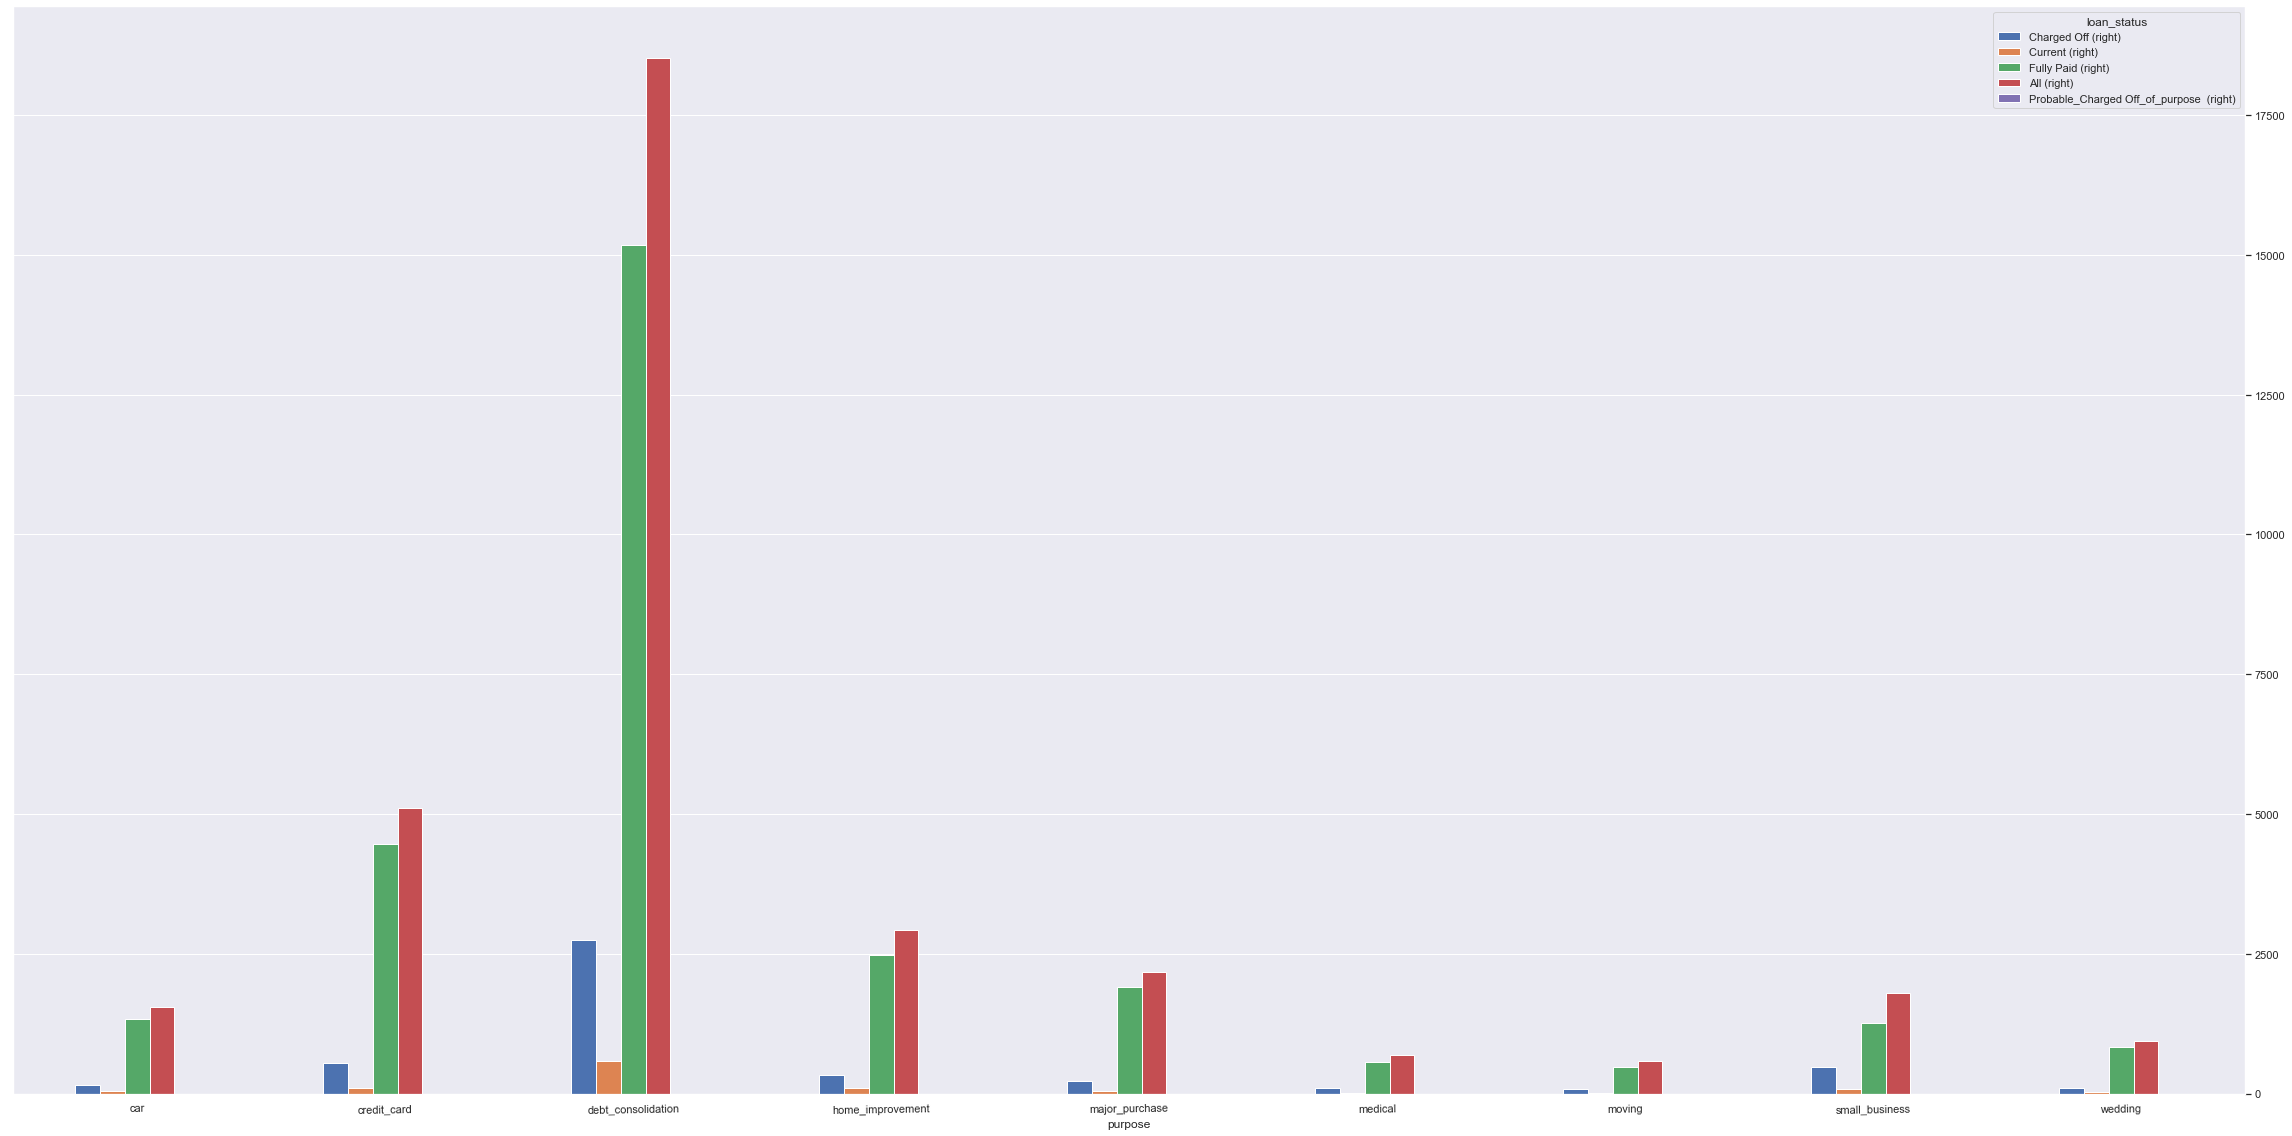

In [407]:
purpose_of_loan.plot(figsize=(40,20),kind='bar',rot=1,secondary_y=True)

In [408]:
grade_of_people = pd.crosstab(lo['grade'], lo['loan_status'],margins=True)
grade_of_people['Probable_Charged Off_of_purpose '] = round((grade_of_people['Charged Off']/grade_of_people['All']),3)

In [409]:
grade_of_people = grade_of_people[0:-1]

In [410]:
grade_of_people

loan_status,Charged Off,Current,Fully Paid,All,Probable_Charged Off_of_purpose
grade,,,,,
A,491,29,8081,8601,0.057
B,1193,294,8872,10359,0.115
C,1132,235,5575,6942,0.163
D,962,194,3481,4637,0.207
E,619,160,1733,2512,0.246
F,286,62,581,929,0.308
G,87,13,176,276,0.315


<AxesSubplot:xlabel='grade'>

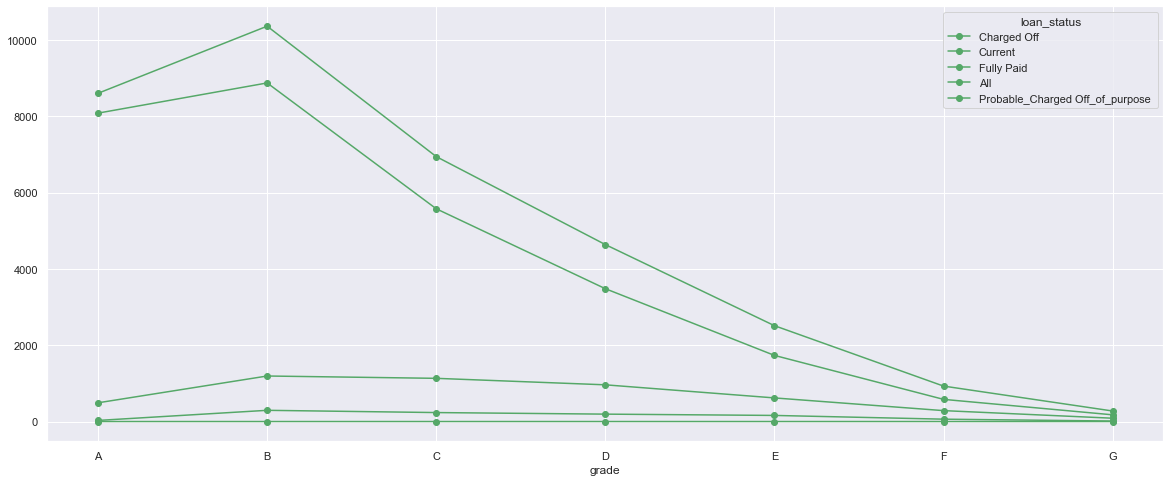

In [411]:
grade_of_people.plot(figsize=(20,8), marker='o',color = 'g')

1)The graph gradually decreases from the group B that shows the loan option opted by people reduces with their grade.

2)The charged off people across the graph remains the same but the of grade F approximately 50% have been charged off.


<AxesSubplot:label='db6d3d9e-c4b6-496a-80f2-f41c595ff649'>

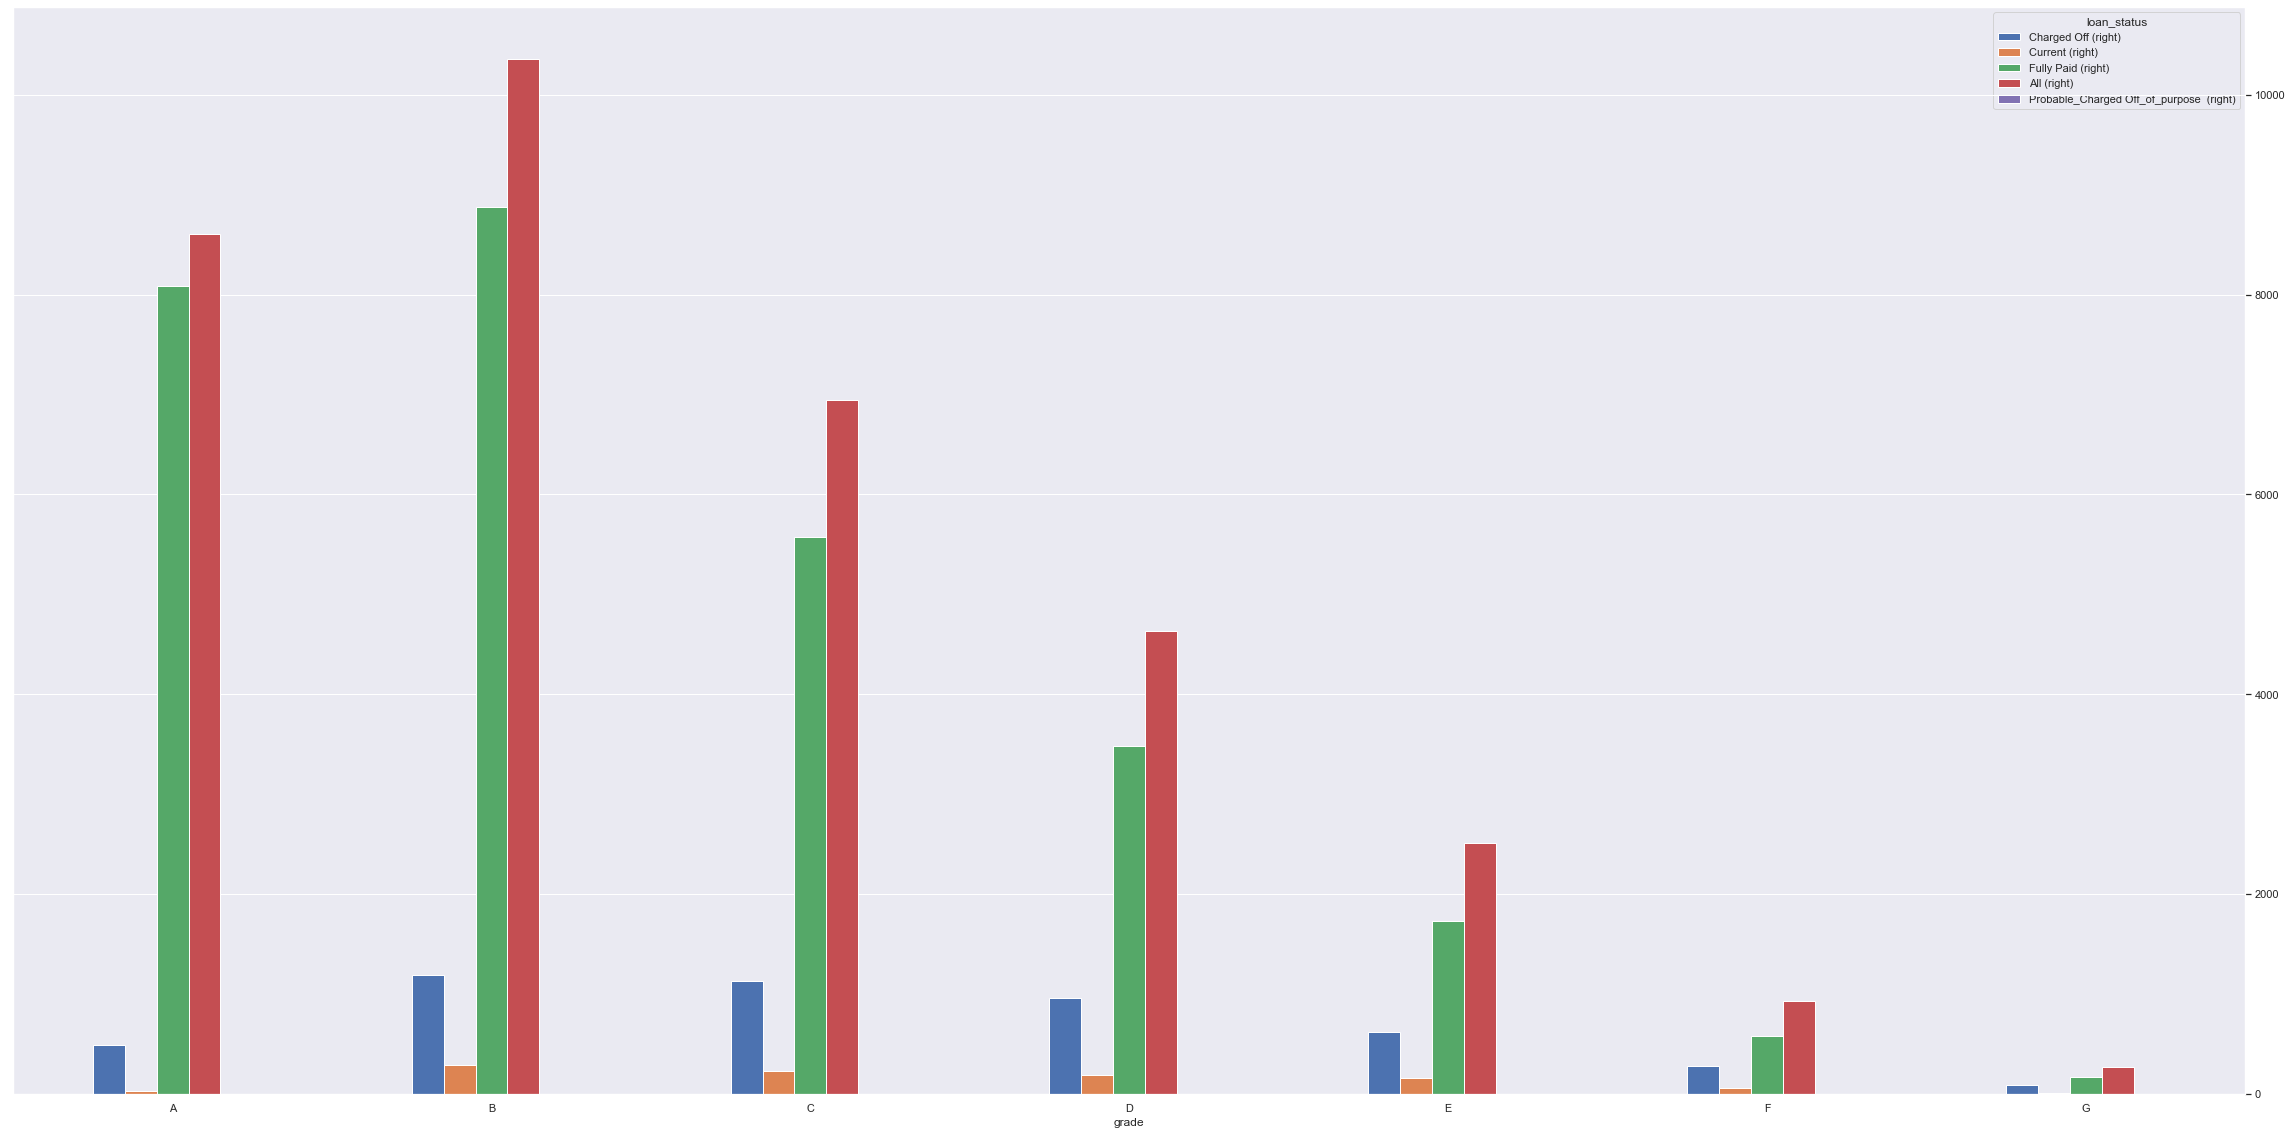

In [412]:
grade_of_people.plot(figsize=(40,20),kind='bar',rot=1,secondary_y=True)

In [413]:
subgrade_of_people = pd.crosstab(lo['sub_grade'], lo['loan_status'],margins=True)
subgrade_of_people['Probable_Charged Off_of_purpose '] = round((subgrade_of_people['Charged Off']/subgrade_of_people['All']),3)

In [414]:
subgrade_of_people = subgrade_of_people[0:-1]

<AxesSubplot:label='ee164a3a-8ea6-447e-8b96-97cfda3cd68d'>

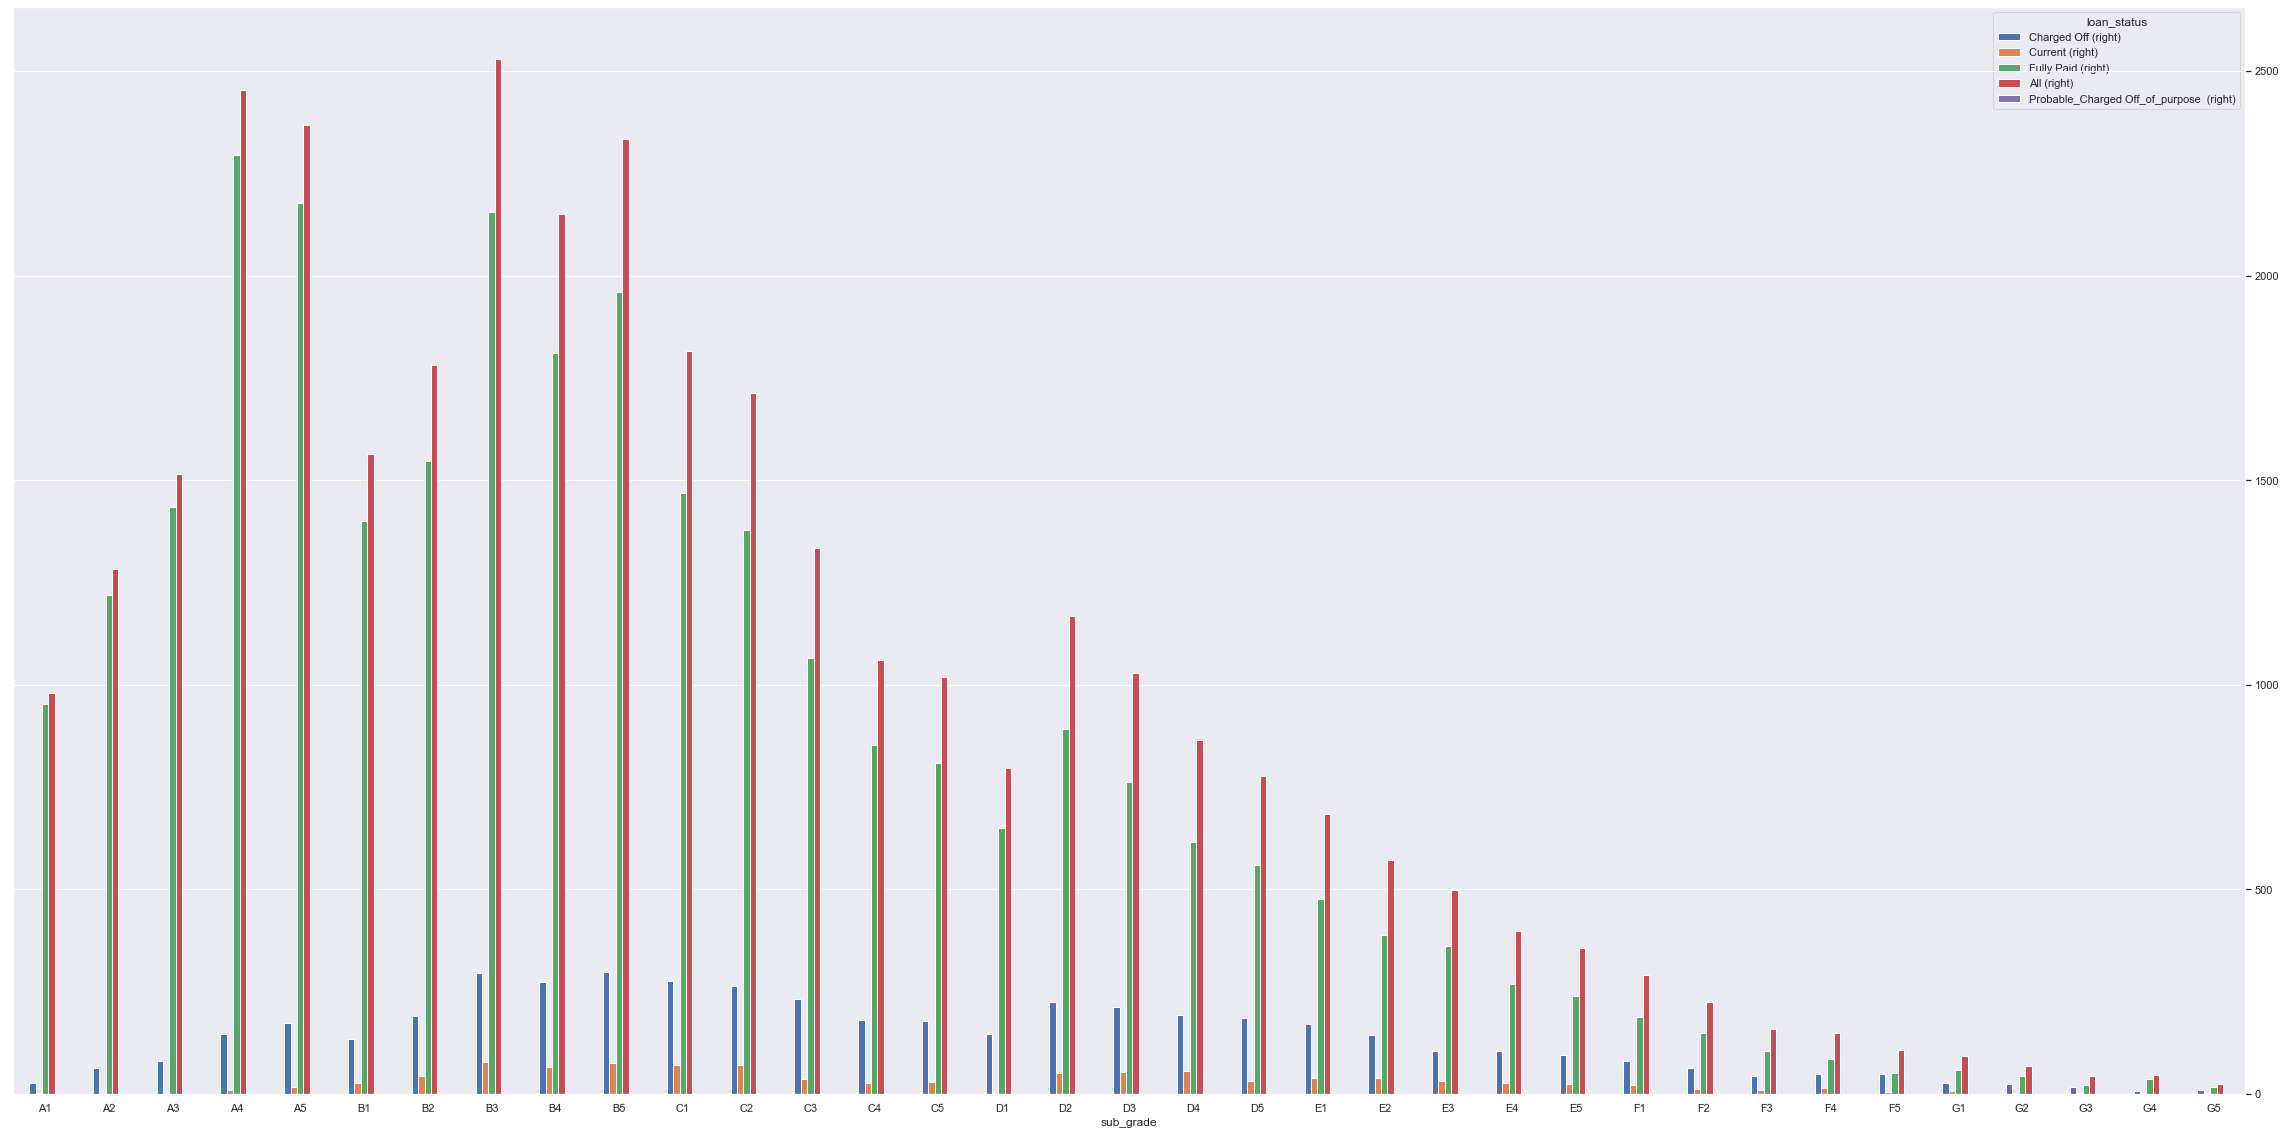

In [415]:
subgrade_of_people.plot(figsize=(40,20),kind='bar',rot=1,secondary_y=True)

1)Even the sub-grade graph gradually decreases from the sub-group B3 that shows the loan option opted by people reduces with their sub-grade.

2)The charged off of loan is higher at the end of the sub-group levels at F & G the charged off is approximately equal to 50%


<AxesSubplot:xlabel='sub_grade'>

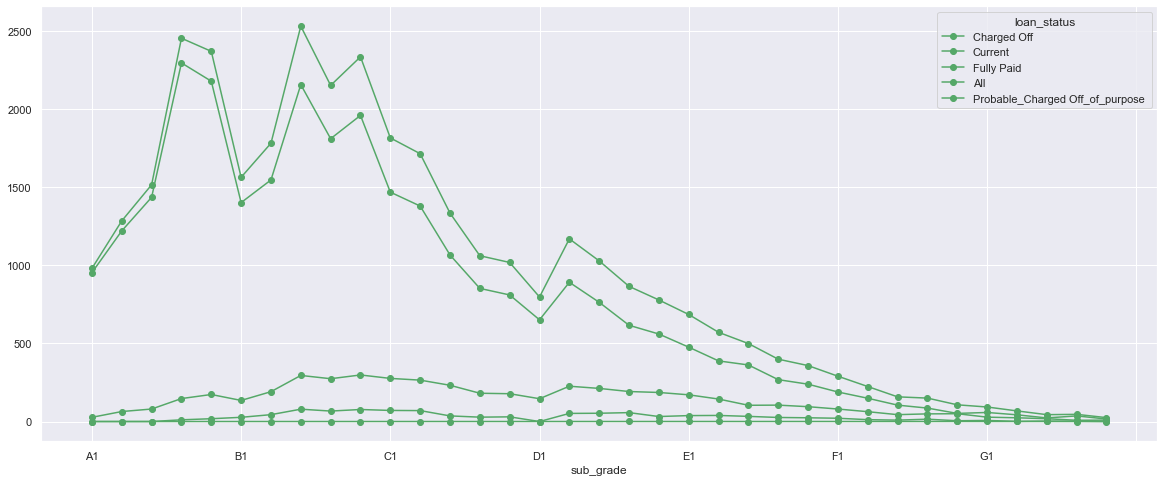

In [454]:
subgrade_of_people.plot(figsize=(20,8), marker='o',color = 'g')

In [465]:
annual_inc_of_people = pd.crosstab(lo['annual_inc_bins'], lo['loan_status'],margins=True)
annual_inc_of_people['Probable_ChargedOff_of_purpose '] = round((annual_inc_of_people['Charged Off']/annual_inc_of_people['All']),3)

In [466]:
annual_inc_of_people = annual_inc_of_people[0:-1]

In [467]:
annual_inc_of_people

loan_status,Charged Off,Current,Fully Paid,All,Probable_ChargedOff_of_purpose
annual_inc_bins,,,,,
0-25000,365,19,1595,1979,0.184
25000-50000,1794,278,9230,11302,0.159
50000-75000,1484,319,8797,10600,0.140
75000-100000,652,196,4684,5532,0.118
100000 above,475,175,4193,4843,0.098


People with income range under 20000-50000 and 50000-75000 opt for loan options 

<AxesSubplot:label='cc8b1fa6-a5ba-45e7-8684-8ec9499f5664'>

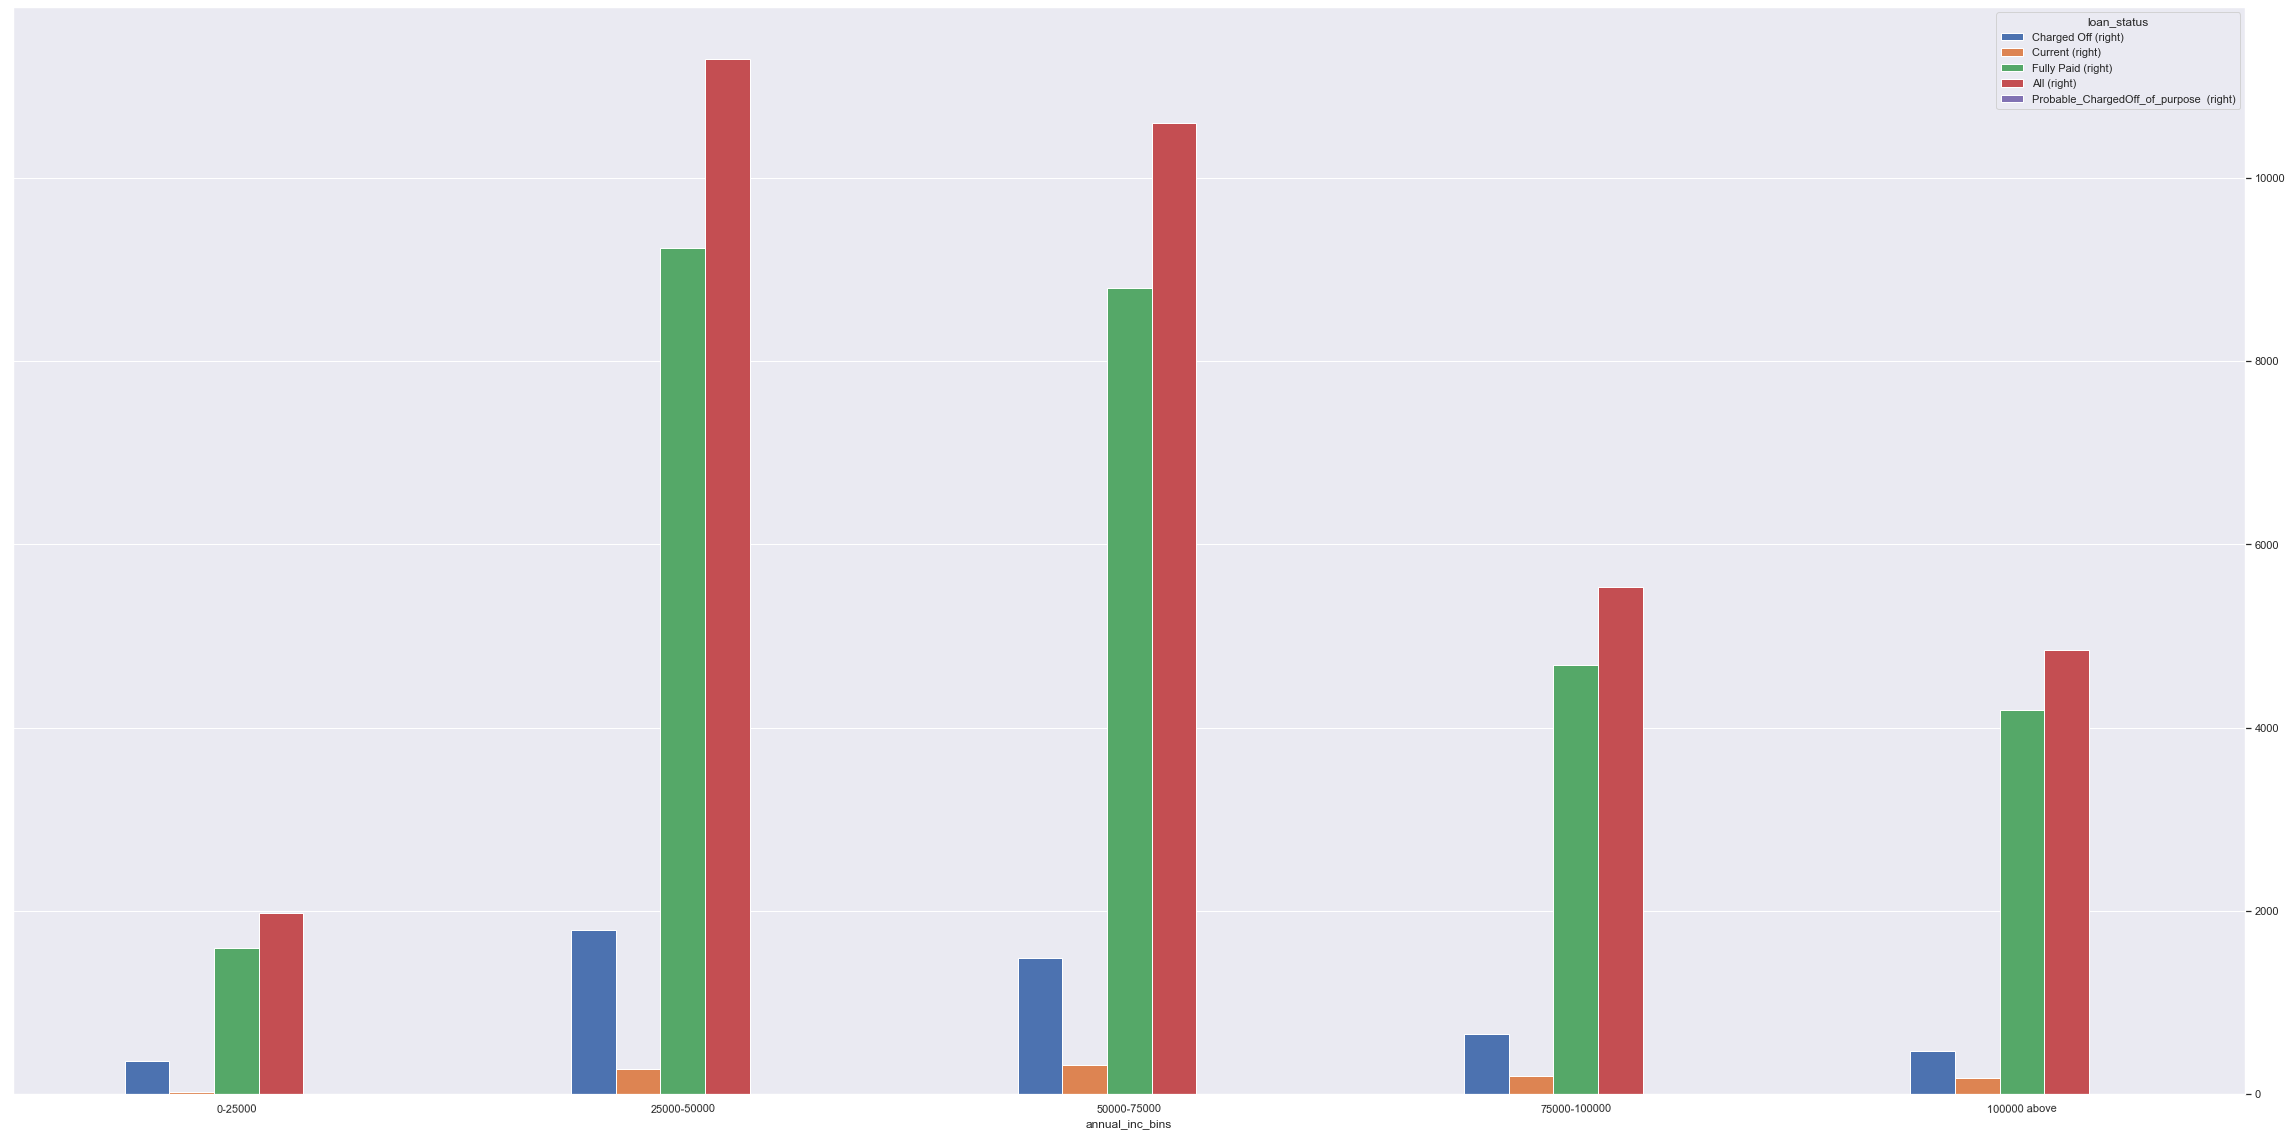

In [468]:
annual_inc_of_people.plot(figsize=(40,20),kind='bar',rot=1,secondary_y=True)

<AxesSubplot:xlabel='annual_inc_bins'>

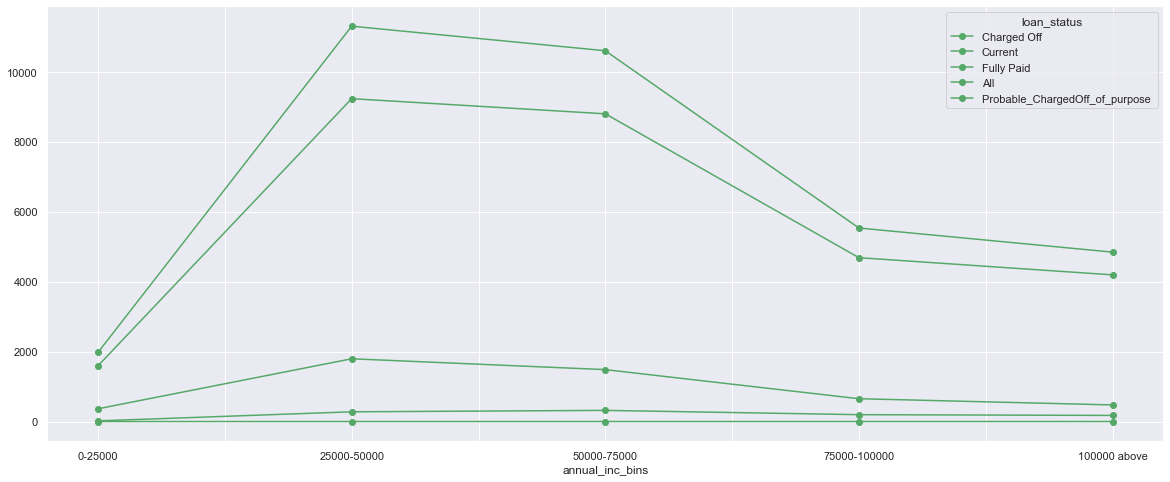

In [473]:
annual_inc_of_people.plot(figsize=(20,8), marker='o',color = 'g')

In [422]:
int_rate_for_people = pd.crosstab(lo['int_rate_bins'], lo['loan_status'],margins=True)
int_rate_for_people['Probable_Charged Off_of_purpose '] = round((int_rate_for_people['Charged Off']/int_rate_for_people['All']),3)

In [423]:
int_rate_for_people

loan_status,Charged Off,Current,Fully Paid,All,Probable_Charged Off_of_purpose
int_rate_bins,,,,,
0-7.5,218,5,4444,4667,0.047
7.5-10,456,55,5442,5953,0.077
10-12.5,1044,231,7004,8279,0.126
12.5-15,1243,227,6374,7844,0.158
15 above,1545,385,4812,6742,0.229
All,4506,903,28076,33485,0.135


In [424]:
int_rate_for_people[0:-1]

loan_status,Charged Off,Current,Fully Paid,All,Probable_Charged Off_of_purpose
int_rate_bins,,,,,
0-7.5,218,5,4444,4667,0.047
7.5-10,456,55,5442,5953,0.077
10-12.5,1044,231,7004,8279,0.126
12.5-15,1243,227,6374,7844,0.158
15 above,1545,385,4812,6742,0.229


 As the interest rate is increasing the probability that person will default is increasing across the graph. 

<AxesSubplot:label='16994e89-e59f-4f4b-89e6-3252e2c19b22'>

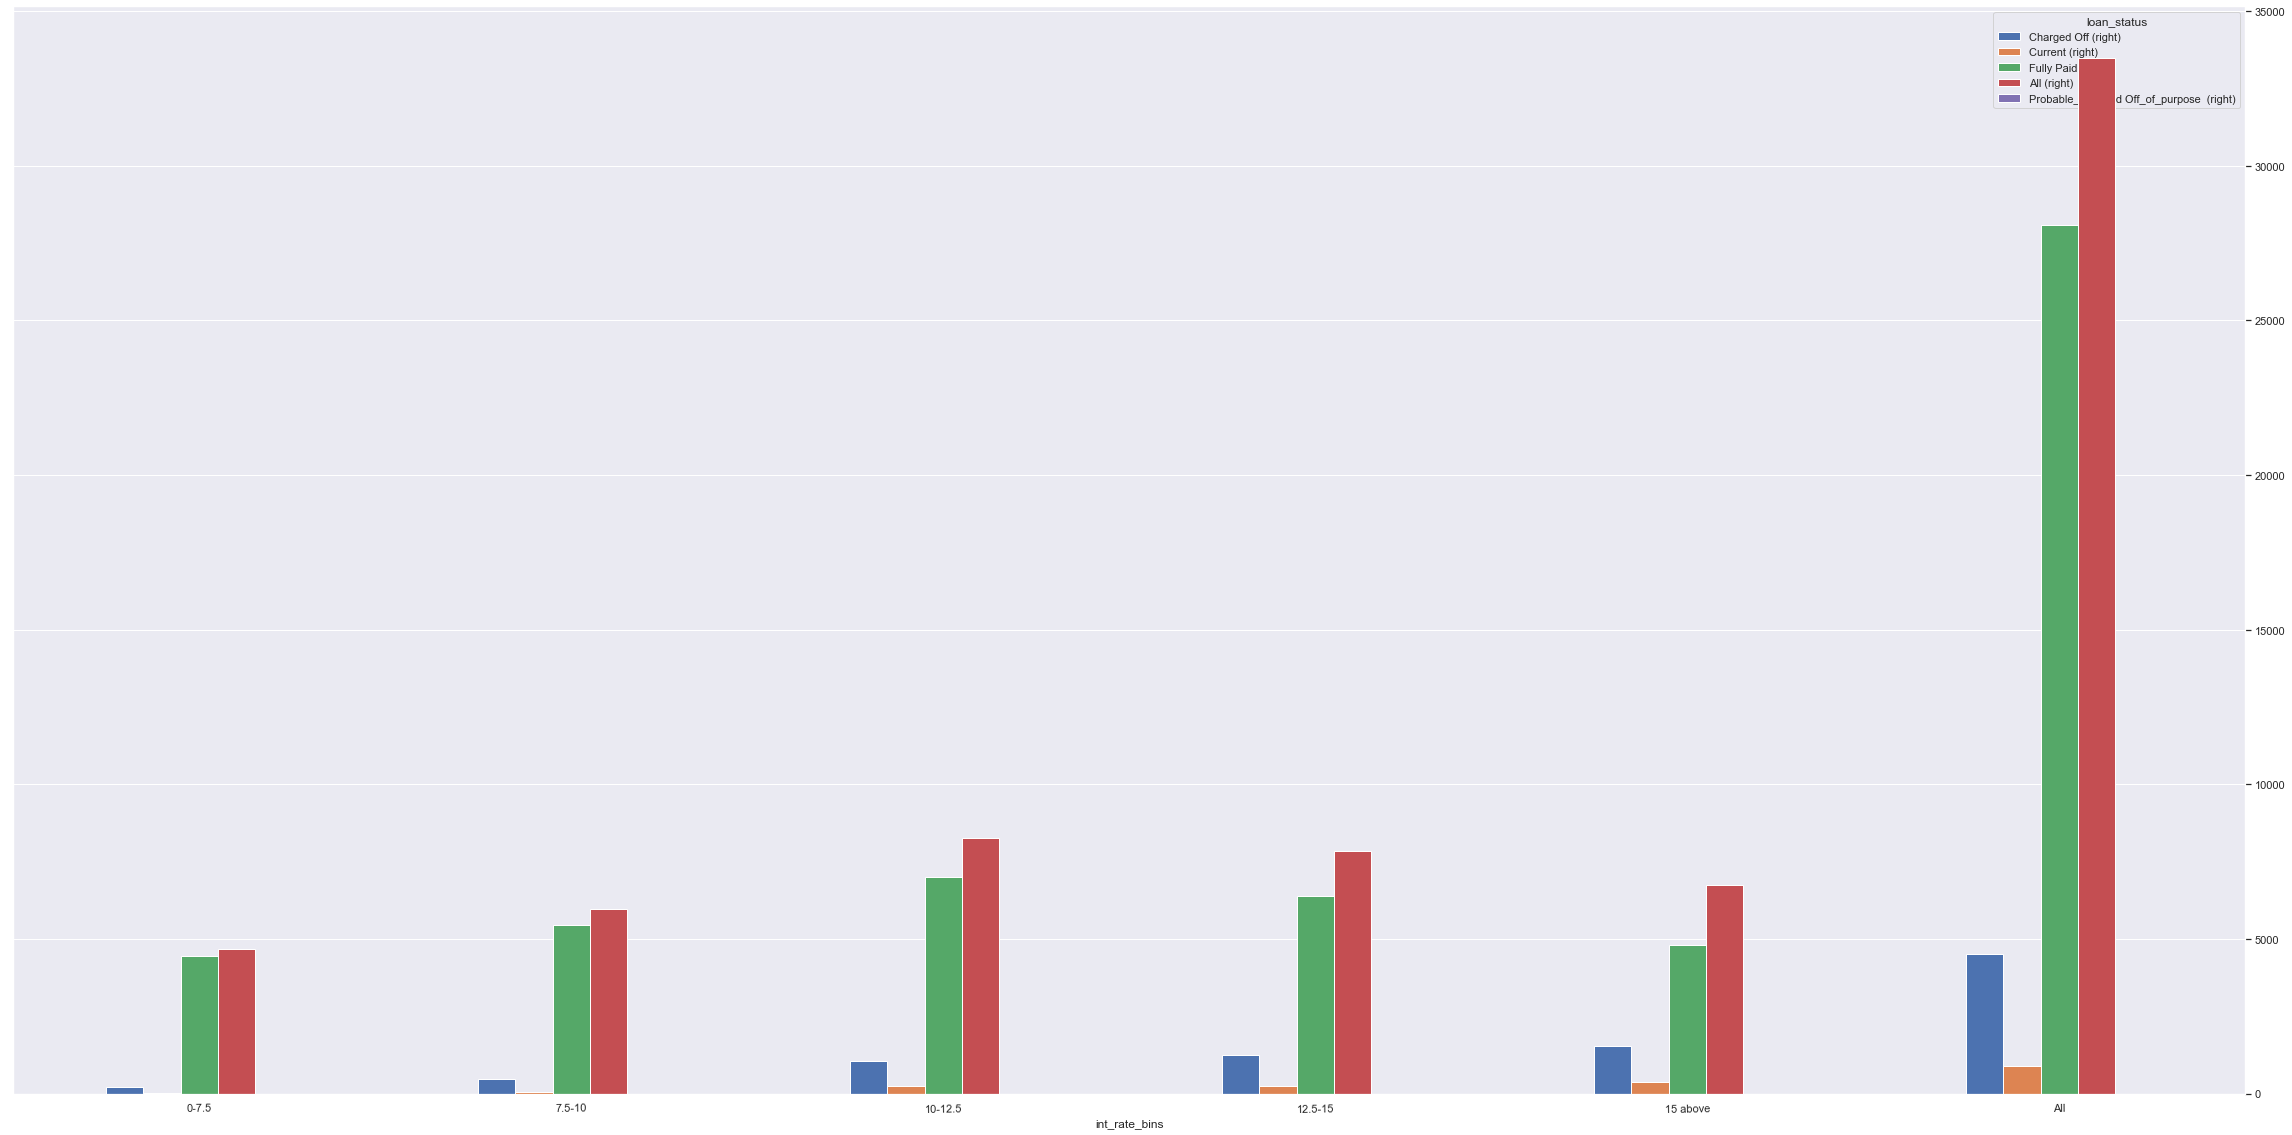

In [425]:
int_rate_for_people.plot(figsize=(40,20),kind='bar',rot=1,secondary_y=True)

In [426]:
emp_experience = pd.crosstab(lo['emp_length'], lo['loan_status'],margins=True)
emp_experience['Probable_Charged Off_of_purpose '] = round((emp_experience['Charged Off']/emp_experience['All']),3)

In [427]:
emp_experience = emp_experience[0:-1]

In [428]:
emp_experience

loan_status,Charged Off,Current,Fully Paid,All,Probable_Charged Off_of_purpose
emp_length,,,,,
0,182,32,640,854,0.213
1 year,385,63,2298,2746,0.140
10+ years,1139,349,6206,7694,0.148
2 years,463,88,3223,3774,0.123
3 years,472,65,3019,3556,0.133
4 years,384,83,2514,2981,0.129
5 years,403,77,2376,2856,0.141
6 years,268,50,1658,1976,0.136
7 years,221,53,1266,1540,0.144


Employees who have less than 1 year of experience have the most probable charge off


<AxesSubplot:label='120753ef-2637-4c1e-9918-a4369ccbf9c6'>

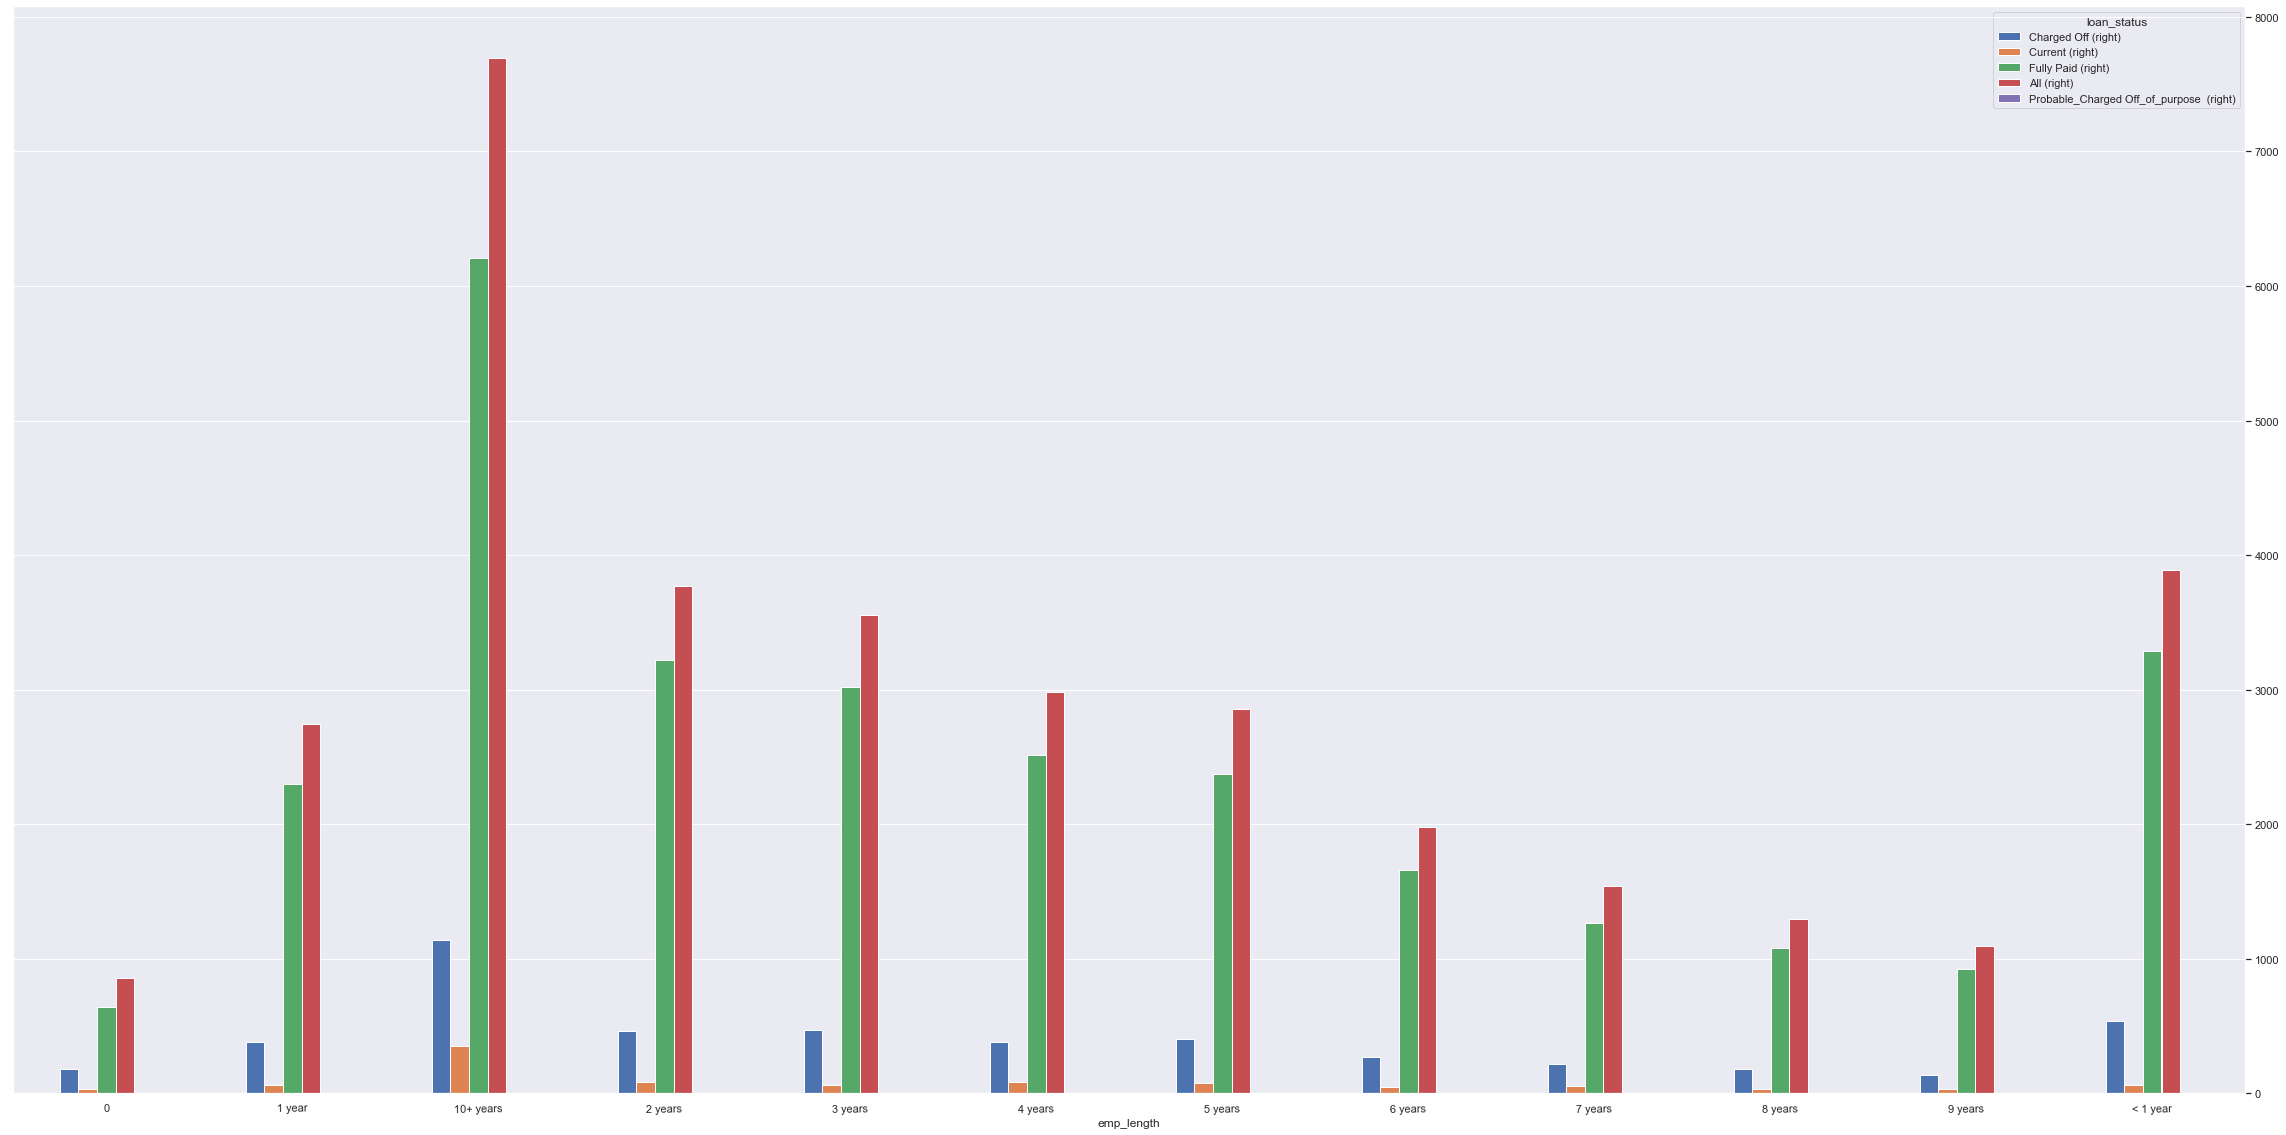

In [429]:
emp_experience.plot(figsize=(40,20),kind='bar',rot=1,secondary_y=True)

In [439]:
emp_dti = pd.crosstab(lo['dti_bins'], lo['loan_status'],margins=True)
emp_dti['Probable_Charged Off_of_purpose '] = round((emp_dti['Charged Off']/emp_dti['All']),3)

Employees coming under the range of DTI 10-20 and 20-25 have the most charge off 


<AxesSubplot:label='7c361bd9-d9b9-4790-9a89-9cbeac845fa8'>

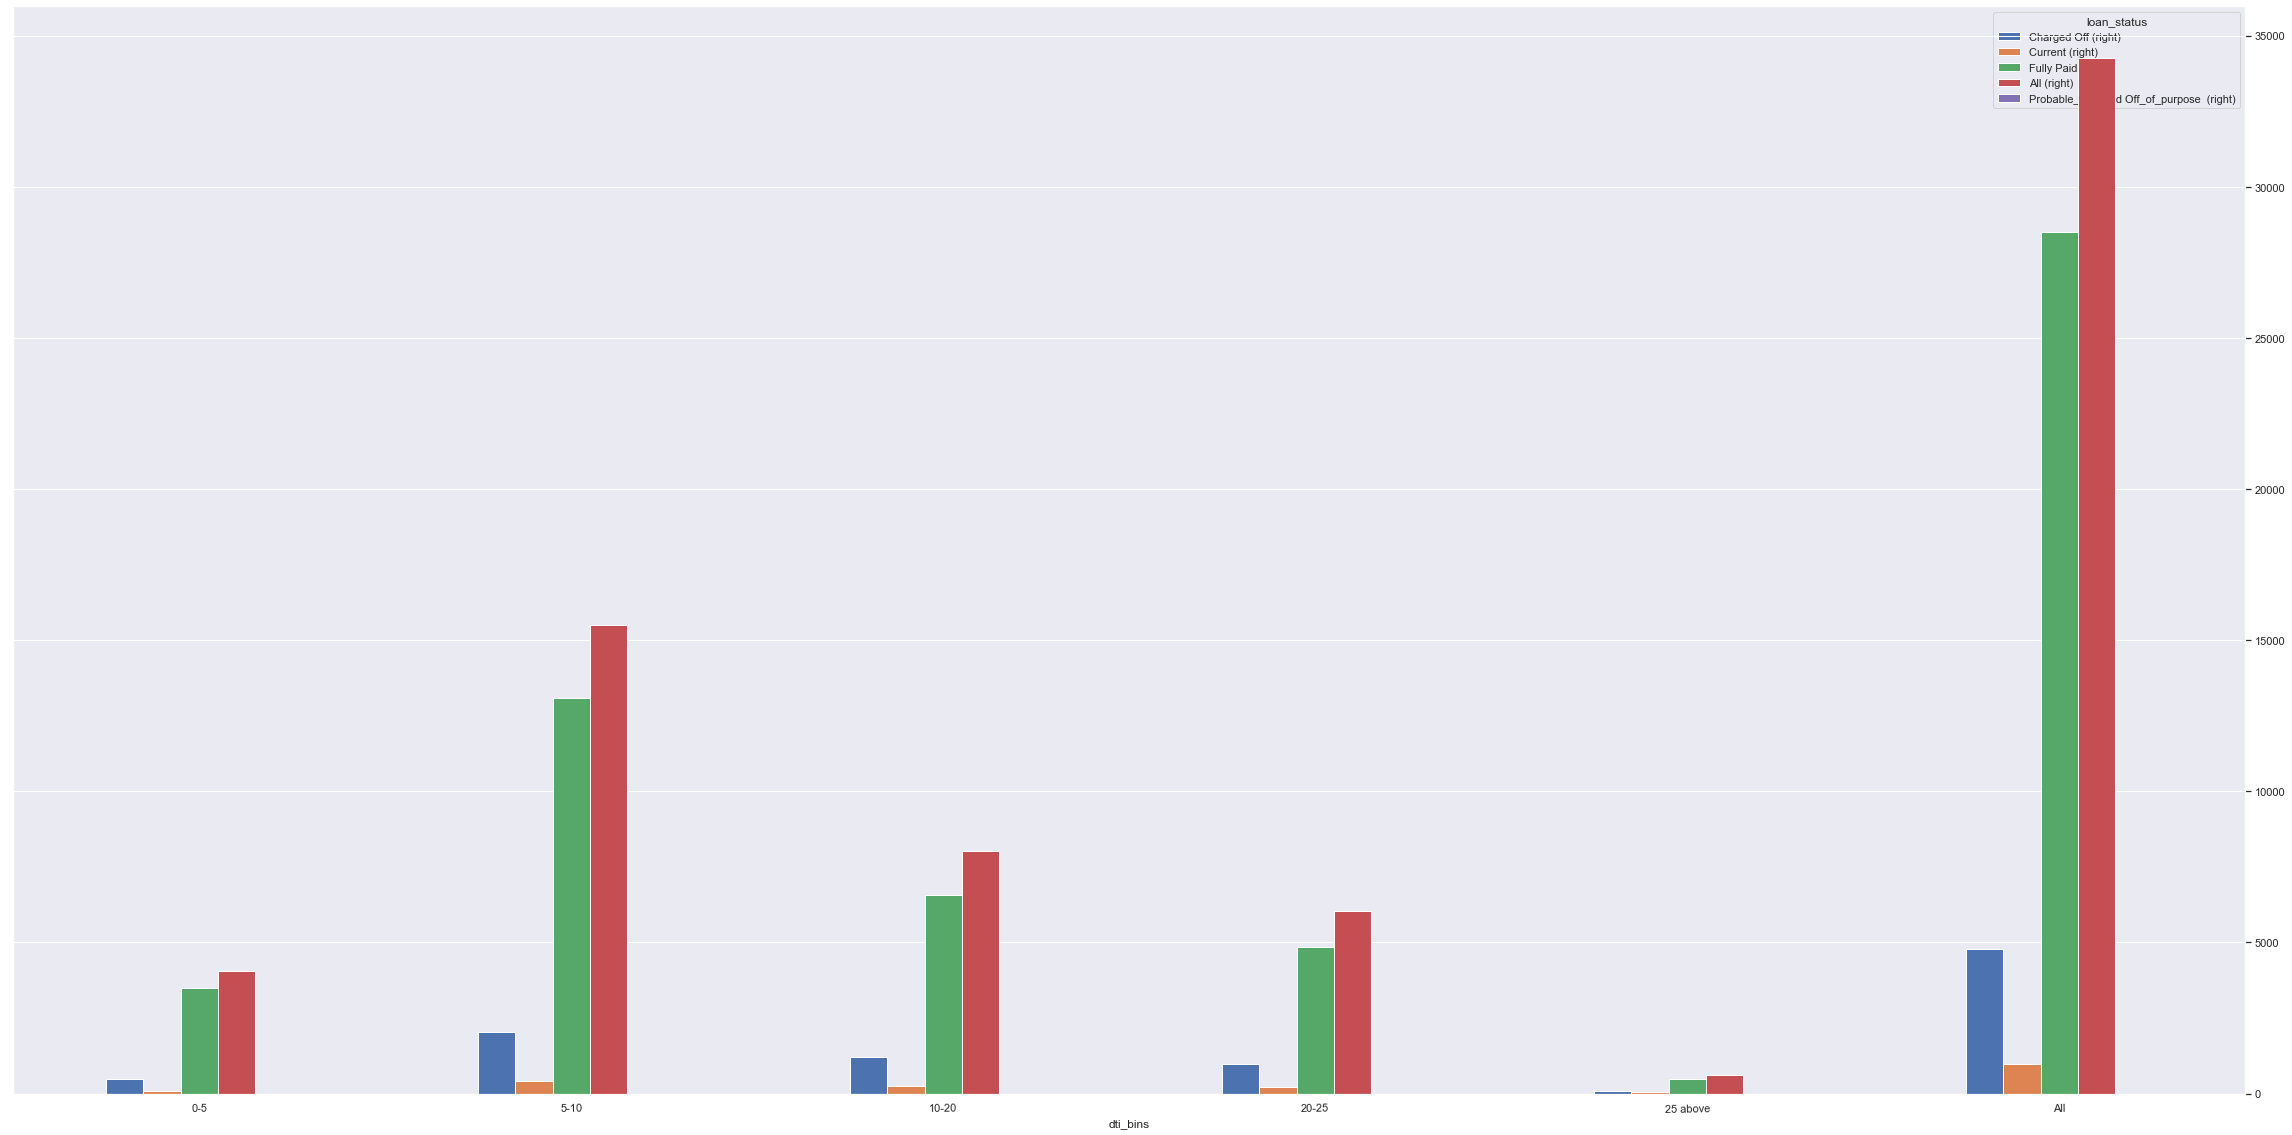

In [440]:
emp_dti.plot(figsize=(40,20),kind='bar',rot=1,secondary_y=True)

In [442]:
emp_dti

loan_status,Charged Off,Current,Fully Paid,All,Probable_Charged Off_of_purpose
dti_bins,,,,,
0-5,485,79,3493,4057,0.120
5-10,2028,398,13082,15508,0.131
10-20,1204,249,6572,8025,0.150
20-25,975,212,4860,6047,0.161
25 above,78,49,492,619,0.126
All,4770,987,28499,34256,0.139
